In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline
import pandas as pd
import atlx_weighted_learning as atlx
import al_rf_unsup_boot_learning as al_unsup
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
import sys
sys.path.append('../')
import support_utils as sup
import data_explore_utils as dex
import display_utils as dut

### Import Candsets

In [2]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/books/'
pattern_of_filename = 'candset_feature_(.{2,4}_.{2,4})'
sep = ','
# ***********************************************

candsets = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [3]:
candsets.keys()

dict_keys(['ban_bx', 'bx_wor', 'ban_half', 'wor_half', 'bx_half', 'ban_wor'])

In [4]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/books/'
pattern_of_filename = 'candset_feature_(.{2,4}_.{2,4})_train'
sep = ','
# ***********************************************

candsets_train = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [5]:
candsets_train.keys()

dict_keys(['bx_wor', 'bx_half', 'ban_bx', 'wor_half', 'ban_wor', 'ban_half'])

In [6]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/books/'
pattern_of_filename = 'candset_feature_(.{2,4}_.{2,4})_test'
sep = ','
# ***********************************************

candsets_test = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [7]:
candsets_test.keys()

dict_keys(['ban_half', 'ban_bx', 'ban_wor', 'bx_wor', 'bx_half', 'wor_half'])

### Feature Sets

In [8]:
all_feature = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pages_num_abs_diff_sim', 'pubdate_days_diff_sim',
       'pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'binding_exact_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

In [9]:
len(all_feature) == len(candsets['ban_bx'].columns.drop(['ids','label']))

True

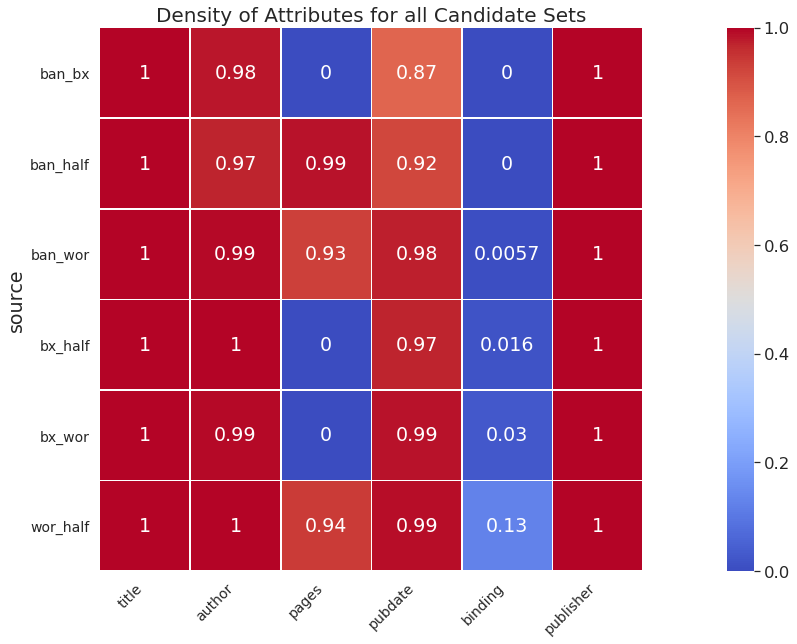

In [10]:
dex.plotDensityAttributesHeatmap(candsets)

In [11]:
# dense features for all combinations

# features excluded where the attribute has a very low density (<3%) for at 
# least one dataset that is involved either as source or target
rc_ban_bx_wor = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pubdate_days_diff_sim','pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

#
rc_ban_bx_half = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pubdate_days_diff_sim','pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

#
rc_ban_half_wor = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pages_num_abs_diff_sim', 'pubdate_days_diff_sim',
       'pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

#
rc_bx_half_wor = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pubdate_days_diff_sim','pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

# assign the different feature sets (different dense features depending on combination)
dense_features_dict = {'ban_bx_wor':rc_ban_bx_wor,'ban_bx_half':rc_ban_bx_half,
                       'ban_half_wor':rc_ban_half_wor,'bx_half_wor':rc_bx_half_wor,
                       'ban_bx':rc_ban_bx_wor,'ban_half':rc_ban_half_wor,'ban_wor':rc_ban_half_wor,
                       'bx_half':rc_bx_half_wor,'bx_wor':rc_bx_half_wor,'wor_half':rc_ban_half_wor}

In [12]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../results/benchmarks/'
supervised_results = 'books_candsets_super_results'
unsupervised_results = 'books_candsets_unsuper_results'

# we use the same random_state for all experiments
random_state = 42

#### Import Passive Learning Baseline Results

In [13]:
candsets_super_results = sup.importJSONFileInDict(path_to_directory+supervised_results)

#### Import Unsupervised Learning Results

In [14]:
candsets_unsuper_results = sup.importJSONFileInDict(path_to_directory+unsupervised_results)

### AL_RF Unsupervised Bootstrap Baseline for ATLX

##### For a single candset

In [ ]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
target_name = 'ban_half'
query_strategies = ['lr_lsvc_rf_dt','random']
estimators = ['rf']
warm_start = True
quota = 200
disagreement = 'vote'
n = 5
feature = all_feature
# ***********************************************

#al_unsup_ban_half = al_unsup.al_unsup_boot_single(candsets,candsets_train,candsets_test,target_name,feature,
#                                                 estimators,query_strategies,quota,warm_start,
#                                                 reweight='score_based',disagreement='vote',n=5)

##### For all combinations

In [ ]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
feature = all_feature
query_strategies = ['lr_lsvc_rf_dt','lr_lsvc_rf_dt_xgb','random']
estimators = ['rf']
warm_start = True
quota = 100
disagreement = 'vote'
n = 5
# ***********************************************

al_results_unsup = al_unsup.al_unsup_boot_all(candsets,candsets_train,candsets_test,feature,
                                              estimators,query_strategies,quota,warm_start,
                                              reweight='score_based',disagreement='vote',n=5)

In [ ]:
#sup.saveResultsToJSON(al_results_unsup,'../../results/benchmarks/books_al_unsup_results')

### ATLX Experiment

In [16]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
query_strategies = ['lr_lsvc_rf_dt_xgb','random']
warm_start = True
weighting = [None,'nn','lrcv_predict_proba']
quota = 100
disagreement = 'vote'
n = 5
bootstrap_clf = 'rf'
n_bootstrapped_samples = 2
# ***********************************************
atlx_2 = atlx.atlx_all(candsets,candsets_train,candsets_test,dense_features_dict,
                                       bootstrap_clf,query_strategies,quota,warm_start,
                                       n_bootstrapped_samples,weighting,disagreement,
                                       n,switch_roles=True)

Start with ATL using different settings for source ban_bx and target bx_wor
Start with Estimator: rf
Start with Query Strategy: lr_lsvc_rf_dt_xgb
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source ban_bx and target bx_wor
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.78; Prec 0.82; Recall 0.75
Average depth of trees at start (iteration 0): 24.3 at last iteration 7.100961538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 76.76 seconds
Corrected labels from transfer: 44
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.70; Prec 0.82; Recall 0.61
Average depth of trees at start (iteration 0): 24.3 at last iteration 7.961538461538462
Progress: |██████████████████████████████████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.77; Prec 0.76; Recall 0.79
Average depth of trees at start (iteration 0): 24.3 at last iteration 7.158653846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 25.22 seconds
Corrected labels from transfer: 32
Start with Weighting Strategy: nn
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using nn
Starting ATL Experiments (WITH transfer!) source ban_bx and target bx_wor
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.78; Prec 0.70; Recall 0.88
Average depth of trees at start (iteration 0): 23.7 at last iteration 7.471153846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 24.73 seconds
Corrected labels from transfer: 38
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Que

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.79; Prec 0.78; Recall 0.81
Average depth of trees at start (iteration 0): 35.0 at last iteration 7.894230769230769
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 32.89 seconds
Corrected labels from transfer: 41
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.94; Recall 0.76
Average depth of trees at start (iteration 0): 35.0 at last iteration 7.288461538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.70 seconds
Corrected labels from transfer: 57
Start with Weighting Strategy: lrcv_predict_proba
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using lrcv_predict_proba
Starting ATL Experiments (WITH transfer!) source bx_wor and target ban_bx
1. Run of 5
Initialize Dataset Object
Initiali

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.88; Recall 0.76
Average depth of trees at start (iteration 0): 36.4 at last iteration 7.533653846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.56 seconds
Corrected labels from transfer: 29
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.90; Recall 0.78
Average depth of trees at start (iteration 0): 36.4 at last iteration 7.384615384615385
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 9.16 seconds
Corrected labels from transfer: 33
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.93; Recall 0.71
Average depth of trees at start (iteration 0): 36.4 at last iteration 6.894230769230769
Progress: |██████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.95; Recall 0.95
Average depth of trees at start (iteration 0): 24.3 at last iteration 3.6490384615384617
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.62 seconds
Corrected labels from transfer: 5
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.94; Prec 0.94; Recall 0.95
Average depth of trees at start (iteration 0): 24.3 at last iteration 4.413461538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.98 seconds
Corrected labels from transfer: 3
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.92; Prec 0.89; Recall 0.97
Average depth of trees at start (iteration 0): 24.3 at last iteration 4.528846153846154
Progress: |███████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.87; Recall 0.82
Average depth of trees at start (iteration 0): 14.3 at last iteration 7.197115384615385
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.79 seconds
Corrected labels from transfer: 41
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.90; Recall 0.77
Average depth of trees at start (iteration 0): 14.3 at last iteration 7.043269230769231
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.23 seconds
Corrected labels from transfer: 39
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.95; Recall 0.75
Average depth of trees at start (iteration 0): 14.3 at last iteration 6.394230769230769
Progress: |████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.91; Prec 0.92; Recall 0.90
Average depth of trees at start (iteration 0): 23.2 at last iteration 7.740384615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 30.63 seconds
Corrected labels from transfer: 23
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.90; Prec 0.91; Recall 0.89
Average depth of trees at start (iteration 0): 23.2 at last iteration 6.778846153846154
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 28.91 seconds
Corrected labels from transfer: 31
Start with Query Strategy: random
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source ban_bx and target bx_half
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strate

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.86; Recall 0.80
Average depth of trees at start (iteration 0): 20.4 at last iteration 6.798076923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.75 seconds
Corrected labels from transfer: 23
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.85; Prec 0.95; Recall 0.76
Average depth of trees at start (iteration 0): 20.4 at last iteration 6.3798076923076925
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 30.01 seconds
Corrected labels from transfer: 37
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.94; Recall 0.72
Average depth of trees at start (iteration 0): 20.4 at last iteration 6.778846153846154
Progress: |███████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.93; Recall 0.75
Average depth of trees at start (iteration 0): 19.9 at last iteration 4.951923076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.42 seconds
Corrected labels from transfer: 15
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.94; Recall 0.76
Average depth of trees at start (iteration 0): 19.9 at last iteration 5.3125
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.53 seconds
Corrected labels from transfer: 18
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.89; Recall 0.77
Average depth of trees at start (iteration 0): 19.9 at last iteration 7.283653846153846
Progress: |█████████████████████

Starting ATL Experiments (WITH transfer!) source ban_bx and target ban_wor
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.80; Recall 0.82
Average depth of trees at start (iteration 0): 20.2 at last iteration 6.673076923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 32.62 seconds
Corrected labels from transfer: 31
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.75; Prec 0.71; Recall 0.79
Average depth of trees at start (iteration 0): 20.2 at last iteration 7.302884615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.78 seconds
Corrected labels from transfer: 36
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: 

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.79; Prec 0.83; Recall 0.75
Average depth of trees at start (iteration 0): 20.2 at last iteration 6.009615384615385
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.38 seconds
Corrected labels from transfer: 26
Start with ATL using different settings for source ban_wor and target ban_bx
Start with Estimator: rf
Start with Query Strategy: lr_lsvc_rf_dt_xgb
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source ban_wor and target ban_bx
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.91; Recall 0.78
Average depth of trees at start (iteration 0): 24.6 at last iteration 6.990384615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 30.15 seconds
Corrected 

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.80; Prec 0.84; Recall 0.76
Average depth of trees at start (iteration 0): 24.6 at last iteration 7.3076923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.84 seconds
Corrected labels from transfer: 32
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.85; Recall 0.84
Average depth of trees at start (iteration 0): 24.6 at last iteration 6.735576923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.42 seconds
Corrected labels from transfer: 36
Start with Weighting Strategy: nn
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using nn
Starting ATL Experiments (WITH transfer!) source ban_wor and target ban_bx
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Que

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.84; Recall 0.85
Average depth of trees at start (iteration 0): 38.7 at last iteration 8.677884615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 33.99 seconds
Corrected labels from transfer: 44
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.79; Recall 0.84
Average depth of trees at start (iteration 0): 38.7 at last iteration 9.485576923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 33.50 seconds
Corrected labels from transfer: 48
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.78; Prec 0.88; Recall 0.70
Average depth of trees at start (iteration 0): 38.7 at last iteration 9.413461538461538
Progress: |████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.68; Prec 0.82; Recall 0.58
Average depth of trees at start (iteration 0): 37.0 at last iteration 7.158653846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 10.32 seconds
Corrected labels from transfer: 33
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.75; Prec 0.84; Recall 0.67
Average depth of trees at start (iteration 0): 37.0 at last iteration 8.235576923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 9.66 seconds
Corrected labels from transfer: 34
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.84; Recall 0.80
Average depth of trees at start (iteration 0): 37.0 at last iteration 7.793269230769231
Progress: |█████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.75; Prec 0.73; Recall 0.77
Average depth of trees at start (iteration 0): 28.5 at last iteration 7.235576923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 24.50 seconds
Corrected labels from transfer: 46
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.72; Prec 0.77; Recall 0.67
Average depth of trees at start (iteration 0): 28.5 at last iteration 6.1826923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 24.38 seconds
Corrected labels from transfer: 39
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.77; Prec 0.73; Recall 0.81
Average depth of trees at start (iteration 0): 28.5 at last iteration 7.206730769230769
Progress: |███████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.90; Prec 0.91; Recall 0.88
Average depth of trees at start (iteration 0): 37.2 at last iteration 6.975961538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.21 seconds
Corrected labels from transfer: 40
Start with Weighting Strategy: nn
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using nn
Starting ATL Experiments (WITH transfer!) source bx_wor and target bx_half
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.89; Prec 0.91; Recall 0.86
Average depth of trees at start (iteration 0): 36.6 at last iteration 7.548076923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 30.59 seconds
Corrected labels from transfer: 40
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Qu

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.91; Prec 0.91; Recall 0.92
Average depth of trees at start (iteration 0): 36.6 at last iteration 5.533653846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.42 seconds
Corrected labels from transfer: 22
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.89; Prec 0.91; Recall 0.88
Average depth of trees at start (iteration 0): 36.6 at last iteration 6.009615384615385
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.89 seconds
Corrected labels from transfer: 22
Start with Weighting Strategy: lrcv_predict_proba
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using lrcv_predict_proba
Starting ATL Experiments (WITH transfer!) source bx_wor and target bx_half
1. Run of 5
Initialize Dataset Object
Initializ

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.78; Prec 0.76; Recall 0.80
Average depth of trees at start (iteration 0): 21.6 at last iteration 7.716346153846154
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 67.06 seconds
Corrected labels from transfer: 37
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.80; Prec 0.75; Recall 0.85
Average depth of trees at start (iteration 0): 21.6 at last iteration 7.923076923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 66.51 seconds
Corrected labels from transfer: 42
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.78; Prec 0.74; Recall 0.83
Average depth of trees at start (iteration 0): 21.6 at last iteration 7.759615384615385
Progress: |████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.76; Recall 0.86
Average depth of trees at start (iteration 0): 37.2 at last iteration 7.581730769230769
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.39 seconds
Corrected labels from transfer: 49
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.81; Recall 0.81
Average depth of trees at start (iteration 0): 37.2 at last iteration 8.100961538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 32.51 seconds
Corrected labels from transfer: 42
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.76; Prec 0.77; Recall 0.76
Average depth of trees at start (iteration 0): 37.2 at last iteration 7.985576923076923
Progress: |████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.79; Prec 0.73; Recall 0.86
Average depth of trees at start (iteration 0): 37.0 at last iteration 7.990384615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 9.39 seconds
Corrected labels from transfer: 34
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.80; Prec 0.79; Recall 0.82
Average depth of trees at start (iteration 0): 37.0 at last iteration 7.538461538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.98 seconds
Corrected labels from transfer: 33
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.80; Recall 0.82
Average depth of trees at start (iteration 0): 37.0 at last iteration 7.524038461538462
Progress: |██████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.67; Prec 0.87; Recall 0.54
Average depth of trees at start (iteration 0): 23.2 at last iteration 7.3798076923076925
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 66.04 seconds
Corrected labels from transfer: 51
Start with Weighting Strategy: lrcv_predict_proba
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using lrcv_predict_proba
Starting ATL Experiments (WITH transfer!) source ban_wor and target bx_wor
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.76; Prec 0.80; Recall 0.73
Average depth of trees at start (iteration 0): 24.4 at last iteration 7.365384615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 66.96 seconds
Corrected labels from transfer: 58
2. Run of 5
Initialize Dataset Object
Initia

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.76; Prec 0.78; Recall 0.75
Average depth of trees at start (iteration 0): 24.4 at last iteration 7.605769230769231
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 24.91 seconds
Corrected labels from transfer: 42
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.77; Prec 0.74; Recall 0.81
Average depth of trees at start (iteration 0): 24.4 at last iteration 6.8701923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 25.17 seconds
Corrected labels from transfer: 43
Start with ATL using different settings for source ban_half and target wor_half
Start with Estimator: rf
Start with Query Strategy: lr_lsvc_rf_dt_xgb
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) sou

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.77; Recall 0.88
Average depth of trees at start (iteration 0): 13.7 at last iteration 6.4375
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.79 seconds
Corrected labels from transfer: 23
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.76; Prec 0.86; Recall 0.68
Average depth of trees at start (iteration 0): 13.7 at last iteration 6.211538461538462
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 9.61 seconds
Corrected labels from transfer: 21
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.82; Recall 0.85
Average depth of trees at start (iteration 0): 13.7 at last iteration 6.288461538461538
Progress: |█████████████████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.97; Prec 0.98; Recall 0.96
Average depth of trees at start (iteration 0): 25.7 at last iteration 6.802884615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.30 seconds
Corrected labels from transfer: 26
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.97; Recall 0.96
Average depth of trees at start (iteration 0): 25.7 at last iteration 6.75
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 32.75 seconds
Corrected labels from transfer: 32
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.97; Recall 0.95
Average depth of trees at start (iteration 0): 25.7 at last iteration 6.163461538461538
Progress: |█████████████████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.95; Recall 0.96
Average depth of trees at start (iteration 0): 25.4 at last iteration 4.1826923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.27 seconds
Corrected labels from transfer: 10
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.98; Recall 0.95
Average depth of trees at start (iteration 0): 25.4 at last iteration 4.269230769230769
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.31 seconds
Corrected labels from transfer: 9
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.94; Recall 0.95
Average depth of trees at start (iteration 0): 25.4 at last iteration 3.985576923076923
Progress: |██████████

Last iteration Performance on Target Test Set: F1 0.91; Prec 0.91; Recall 0.91
Average depth of trees at start (iteration 0): 14.3 at last iteration 6.100961538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 29.98 seconds
Corrected labels from transfer: 45
Start with Query Strategy: random
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source ban_half and target bx_half
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.89; Recall 0.80
Average depth of trees at start (iteration 0): 15.7 at last iteration 6.153846153846154
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.11 seconds
Corrected labels from transfer: 16
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Perform

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.97; Recall 0.95
Average depth of trees at start (iteration 0): 20.4 at last iteration 6.201923076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.47 seconds
Corrected labels from transfer: 49
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.97; Prec 0.99; Recall 0.95
Average depth of trees at start (iteration 0): 20.4 at last iteration 6.091346153846154
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 30.87 seconds
Corrected labels from transfer: 44
Start with Weighting Strategy: nn
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using nn
Starting ATL Experiments (WITH transfer!) source bx_half and target ban_half
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize 

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.98; Recall 0.95
Average depth of trees at start (iteration 0): 20.4 at last iteration 4.394230769230769
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.28 seconds
Corrected labels from transfer: 21
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.96; Recall 0.95
Average depth of trees at start (iteration 0): 20.4 at last iteration 3.1201923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.09 seconds
Corrected labels from transfer: 20
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.95; Recall 0.95
Average depth of trees at start (iteration 0): 20.4 at last iteration 4.043269230769231
Progress: |█████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.78; Recall 0.91
Average depth of trees at start (iteration 0): 14.2 at last iteration 6.884615384615385
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.62 seconds
Corrected labels from transfer: 38
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.78; Recall 0.84
Average depth of trees at start (iteration 0): 14.2 at last iteration 6.168269230769231
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.98 seconds
Corrected labels from transfer: 35
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.80; Prec 0.77; Recall 0.84
Average depth of trees at start (iteration 0): 14.2 at last iteration 7.048076923076923
Progress: |████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.97; Recall 0.95
Average depth of trees at start (iteration 0): 23.7 at last iteration 6.5625
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.36 seconds
Corrected labels from transfer: 37
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.97; Recall 0.95
Average depth of trees at start (iteration 0): 23.7 at last iteration 6.514423076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.67 seconds
Corrected labels from transfer: 44
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.98; Recall 0.95
Average depth of trees at start (iteration 0): 23.7 at last iteration 6.100961538461538
Progress: |███████████████████

Starting ATL Experiments (WITH transfer!) source ban_wor and target ban_half
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.94; Prec 0.93; Recall 0.95
Average depth of trees at start (iteration 0): 21.6 at last iteration 3.875
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.26 seconds
Corrected labels from transfer: 13
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.95; Recall 0.96
Average depth of trees at start (iteration 0): 21.6 at last iteration 4.278846153846154
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.72 seconds
Corrected labels from transfer: 8
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.94; Prec

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.90; Prec 0.92; Recall 0.89
Average depth of trees at start (iteration 0): 28.8 at last iteration 6.884615384615385
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.34 seconds
Corrected labels from transfer: 47
Start with Weighting Strategy: lrcv_predict_proba
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using lrcv_predict_proba
Starting ATL Experiments (WITH transfer!) source wor_half and target bx_half
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.81; Recall 0.85
Average depth of trees at start (iteration 0): 26.3 at last iteration 7.514423076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 29.54 seconds
Corrected labels from transfer: 47
2. Run of 5
Initialize Dataset Object
Initi

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.90; Prec 0.92; Recall 0.88
Average depth of trees at start (iteration 0): 26.3 at last iteration 5.110576923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.61 seconds
Corrected labels from transfer: 25
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.83; Recall 0.80
Average depth of trees at start (iteration 0): 26.3 at last iteration 6.3076923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.70 seconds
Corrected labels from transfer: 28
Start with ATL using different settings for source bx_half and target wor_half
Start with Estimator: rf
Start with Query Strategy: lr_lsvc_rf_dt_xgb
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.77; Prec 0.78; Recall 0.76
Average depth of trees at start (iteration 0): 20.4 at last iteration 7.8125
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 10.04 seconds
Corrected labels from transfer: 25
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.79; Prec 0.80; Recall 0.78
Average depth of trees at start (iteration 0): 20.4 at last iteration 7.538461538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 9.15 seconds
Corrected labels from transfer: 21
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.84; Recall 0.84
Average depth of trees at start (iteration 0): 20.4 at last iteration 7.158653846153846
Progress: |████████████████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.73; Recall 0.94
Average depth of trees at start (iteration 0): 26.1 at last iteration 7.115384615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 30.86 seconds
Corrected labels from transfer: 22
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.78; Recall 0.88
Average depth of trees at start (iteration 0): 26.1 at last iteration 7.673076923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.39 seconds
Corrected labels from transfer: 27
4. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.80; Recall 0.87
Average depth of trees at start (iteration 0): 26.1 at last iteration 7.201923076923077
Progress: |████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.79; Recall 0.83
Average depth of trees at start (iteration 0): 26.2 at last iteration 8.04326923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.20 seconds
Corrected labels from transfer: 20
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.75; Recall 0.91
Average depth of trees at start (iteration 0): 26.2 at last iteration 6.7548076923076925
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.40 seconds
Corrected labels from transfer: 18
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.78; Recall 0.87
Average depth of trees at start (iteration 0): 26.2 at last iteration 6.519230769230769
Progress: |██████████

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.85; Recall 0.82
Average depth of trees at start (iteration 0): 23.0 at last iteration 7.605769230769231
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 33.40 seconds
Corrected labels from transfer: 40
Start with Query Strategy: random
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source ban_wor and target wor_half
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.78; Recall 0.88
Average depth of trees at start (iteration 0): 23.7 at last iteration 5.475961538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 9.02 seconds
Corrected labels from transfer: 20
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strat

In [17]:
#sup.saveResultsToJSON(atlx_2,'../../results/atlx/books_atlx_results_2')

Saved in ../../results/atlx/books_atlx_results_2_20200719.json


#### Different Bootstrap Sample Size

In [18]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
query_strategies = ['lr_lsvc_rf_dt_xgb','random']
warm_start = True
weighting = [None,'nn','lrcv_predict_proba']
quota = 100
disagreement = 'vote'
n = 5
bootstrap_clf = 'rf'
n_bootstrapped_samples = 10
# ***********************************************
atlx_10 = atlx.atlx_all(candsets,candsets_train,candsets_test,dense_features_dict,
                                       bootstrap_clf,query_strategies,quota,warm_start,
                                       n_bootstrapped_samples,weighting,disagreement,
                                       n,switch_roles=True)

Start with ATL using different settings for source ban_bx and target bx_wor
Start with Estimator: rf
Start with Query Strategy: lr_lsvc_rf_dt_xgb
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source ban_bx and target bx_wor
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.77; Prec 0.77; Recall 0.77
Average depth of trees at start (iteration 0): 24.3 at last iteration 8.41826923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 66.25 seconds
Corrected labels from transfer: 42
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize 

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.77; Prec 0.76; Recall 0.78
Average depth of trees at start (iteration 0): 24.3 at last iteration 7.365384615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 25.85 seconds
Corrected labels from transfer: 36
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.77; Prec 0.79; Recall 0.75
Average depth of trees at start (iteration 0): 24.3 at last iteration 7.471153846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 25.14 seconds
Corrected labels from transfer: 41
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.93; Recall 0.72
Average depth of trees at start (iteration 0): 37.2 at last iteration 7.552884615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.60 seconds
Corrected labels from transfer: 50
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.93; Recall 0.73
Average depth of trees at start (iteration 0): 37.2 at last iteration 8.341346153846153
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.27 seconds
Corrected labels from transfer: 49
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.75; Recall 0.87
Average depth of trees at start (iteration 0): 37.2 at last iteration 7.1923076923076925
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.18 seconds
Corrected labels from transfer: 28
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.79; Recall 0.85
Average depth of trees at start (iteration 0): 37.2 at last iteration 8.1875
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.15 seconds
Corrected labels from transfer: 25
3. Run of 5
Initialize Dataset Object
Initialize Learnin

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.96; Recall 0.96
Average depth of trees at start (iteration 0): 24.3 at last iteration 6.7548076923076925
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 30.58 seconds
Corrected labels from transfer: 29
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.97; Recall 0.95
Average depth of trees at start (iteration 0): 24.3 at last iteration 6.509615384615385
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 30.88 seconds
Corrected labels from transfer: 36
3. Run of 5
Initialize Dataset Object
Initi

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.94; Recall 0.95
Average depth of trees at start (iteration 0): 24.3 at last iteration 4.091346153846154
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.94 seconds
Corrected labels from transfer: 6
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.94; Recall 0.95
Average depth of trees at start (iteration 0): 24.3 at last iteration 5.471153846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.35 seconds
Corrected labels from transfer: 8
3. Run of 5
Initialize Dataset Object
Initialize

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.95; Recall 0.74
Average depth of trees at start (iteration 0): 15.7 at last iteration 7.014423076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.26 seconds
Corrected labels from transfer: 44
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.86; Prec 0.92; Recall 0.81
Average depth of trees at start (iteration 0): 15.7 at last iteration 7.149038461538462
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.80 seconds
Corrected labels from transfer: 47
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.94; Recall 0.71
Average depth of trees at start (iteration 0): 15.7 at last iteration 6.1298076923076925
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.22 seconds
Corrected labels from transfer: 16
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.91; Recall 0.77
Average depth of trees at start (iteration 0): 15.7 at last iteration 6.644230769230769
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.58 seconds
Corrected labels from transfer: 21
3. Run of 5
Initialize Dataset Object
Initial

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.90; Prec 0.91; Recall 0.90
Average depth of trees at start (iteration 0): 24.3 at last iteration 7.5048076923076925
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 30.36 seconds
Corrected labels from transfer: 30
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.89; Prec 0.91; Recall 0.88
Average depth of trees at start (iteration 0): 24.3 at last iteration 8.384615384615385
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 30.39 seconds
Corrected labels from transfer: 26
3. Run of 5
Initialize Dataset Object
Initi

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.90; Prec 0.90; Recall 0.89
Average depth of trees at start (iteration 0): 24.3 at last iteration 4.822115384615385
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.76 seconds
Corrected labels from transfer: 4
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.90; Prec 0.92; Recall 0.89
Average depth of trees at start (iteration 0): 24.3 at last iteration 4.663461538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.04 seconds
Corrected labels from transfer: 7
3. Run of 5
Initialize Dataset Object
Initialize

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.90; Recall 0.77
Average depth of trees at start (iteration 0): 20.4 at last iteration 7.600961538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.77 seconds
Corrected labels from transfer: 30
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.85; Recall 0.82
Average depth of trees at start (iteration 0): 20.4 at last iteration 7.75
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.50 seconds
Corrected labels from transfer: 37
3. Run of 5
Initialize Dataset Object
Initialize Learning

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.90; Recall 0.74
Average depth of trees at start (iteration 0): 20.4 at last iteration 7.225961538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.03 seconds
Corrected labels from transfer: 22
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.78; Prec 0.93; Recall 0.67
Average depth of trees at start (iteration 0): 20.4 at last iteration 6.706730769230769
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.21 seconds
Corrected labels from transfer: 12
3. Run of 5
Initialize Dataset Object
Initiali

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.78; Recall 0.85
Average depth of trees at start (iteration 0): 24.3 at last iteration 8.192307692307692
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 33.54 seconds
Corrected labels from transfer: 42
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.79; Recall 0.87
Average depth of trees at start (iteration 0): 24.3 at last iteration 6.990384615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.99 seconds
Corrected labels from transfer: 44
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.77; Recall 0.85
Average depth of trees at start (iteration 0): 24.3 at last iteration 7.076923076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.70 seconds
Corrected labels from transfer: 16
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.75; Recall 0.88
Average depth of trees at start (iteration 0): 24.3 at last iteration 6.894230769230769
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.04 seconds
Corrected labels from transfer: 18
3. Run of 5
Initialize Dataset Object
Initiali

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.90; Recall 0.75
Average depth of trees at start (iteration 0): 24.6 at last iteration 7.389423076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 32.31 seconds
Corrected labels from transfer: 50
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.88; Recall 0.81
Average depth of trees at start (iteration 0): 24.6 at last iteration 7.5
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 29.77 seconds
Corrected labels from transfer: 55
3. Run of 5
Initialize Dataset Object
Initialize Learning 

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.85; Prec 0.92; Recall 0.78
Average depth of trees at start (iteration 0): 24.6 at last iteration 6.644230769230769
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.17 seconds
Corrected labels from transfer: 35
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.85; Prec 0.88; Recall 0.81
Average depth of trees at start (iteration 0): 24.6 at last iteration 7.783653846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.43 seconds
Corrected labels from transfer: 38
3. Run of 5
Initialize Dataset Object
Initiali

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.84; Recall 0.81
Average depth of trees at start (iteration 0): 37.2 at last iteration 9.461538461538462
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 34.18 seconds
Corrected labels from transfer: 54
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.85; Recall 0.81
Average depth of trees at start (iteration 0): 37.2 at last iteration 9.067307692307692
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 33.99 seconds
Corrected labels from transfer: 50
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.82; Recall 0.83
Average depth of trees at start (iteration 0): 37.2 at last iteration 7.326923076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.69 seconds
Corrected labels from transfer: 40
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.80; Prec 0.83; Recall 0.77
Average depth of trees at start (iteration 0): 37.2 at last iteration 6.326923076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.49 seconds
Corrected labels from transfer: 31
3. Run of 5
Initialize Dataset Object
Initiali

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.79; Prec 0.75; Recall 0.84
Average depth of trees at start (iteration 0): 28.5 at last iteration 7.543269230769231
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 65.83 seconds
Corrected labels from transfer: 45
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.77; Prec 0.74; Recall 0.79
Average depth of trees at start (iteration 0): 28.5 at last iteration 8.341346153846153
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 66.42 seconds
Corrected labels from transfer: 49
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.77; Prec 0.79; Recall 0.75
Average depth of trees at start (iteration 0): 28.5 at last iteration 7.125
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 24.82 seconds
Corrected labels from transfer: 39
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.75; Prec 0.74; Recall 0.77
Average depth of trees at start (iteration 0): 28.5 at last iteration 8.4375
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 25.75 seconds
Corrected labels from transfer: 50
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_l

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.89; Prec 0.90; Recall 0.89
Average depth of trees at start (iteration 0): 37.2 at last iteration 9.158653846153847
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.61 seconds
Corrected labels from transfer: 41
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.89; Prec 0.92; Recall 0.87
Average depth of trees at start (iteration 0): 37.2 at last iteration 8.41826923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 30.57 seconds
Corrected labels from transfer: 43
3. Run of 5
Initialize Dataset Object
Initial

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.86; Prec 0.92; Recall 0.80
Average depth of trees at start (iteration 0): 37.2 at last iteration 7.375
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.54 seconds
Corrected labels from transfer: 30
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.91; Prec 0.91; Recall 0.91
Average depth of trees at start (iteration 0): 37.2 at last iteration 6.975961538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.60 seconds
Corrected labels from transfer: 23
3. Run of 5
Initialize Dataset Object
Initialize Learning 

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.76; Prec 0.86; Recall 0.68
Average depth of trees at start (iteration 0): 20.4 at last iteration 7.048076923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 65.23 seconds
Corrected labels from transfer: 28
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.75; Prec 0.80; Recall 0.72
Average depth of trees at start (iteration 0): 20.4 at last iteration 8.461538461538462
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 66.23 seconds
Corrected labels from transfer: 33
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.72; Prec 0.82; Recall 0.64
Average depth of trees at start (iteration 0): 20.4 at last iteration 7.75
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 24.90 seconds
Corrected labels from transfer: 25
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.76; Prec 0.78; Recall 0.74
Average depth of trees at start (iteration 0): 20.4 at last iteration 7.298076923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 26.23 seconds
Corrected labels from transfer: 26
3. Run of 5
Initialize Dataset Object
Initialize Learning

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.83; Recall 0.81
Average depth of trees at start (iteration 0): 37.2 at last iteration 8.25
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 33.34 seconds
Corrected labels from transfer: 46
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.79; Recall 0.85
Average depth of trees at start (iteration 0): 37.2 at last iteration 7.990384615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 33.11 seconds
Corrected labels from transfer: 57
3. Run of 5
Initialize Dataset Object
Initialize Learning

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.78; Recall 0.85
Average depth of trees at start (iteration 0): 37.2 at last iteration 7.105769230769231
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.93 seconds
Corrected labels from transfer: 28
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.87; Recall 0.77
Average depth of trees at start (iteration 0): 37.2 at last iteration 7.759615384615385
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.70 seconds
Corrected labels from transfer: 27
3. Run of 5
Initialize Dataset Object
Initiali

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.78; Prec 0.82; Recall 0.75
Average depth of trees at start (iteration 0): 24.6 at last iteration 7.1201923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 65.68 seconds
Corrected labels from transfer: 58
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.75; Prec 0.79; Recall 0.71
Average depth of trees at start (iteration 0): 24.6 at last iteration 7.923076923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 65.84 seconds
Corrected labels from transfer: 44
3. Run of 5
Initialize Dataset Object
Initi

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.75; Prec 0.80; Recall 0.71
Average depth of trees at start (iteration 0): 24.6 at last iteration 6.043269230769231
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 24.42 seconds
Corrected labels from transfer: 39
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.75; Prec 0.79; Recall 0.71
Average depth of trees at start (iteration 0): 24.6 at last iteration 7.2451923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 26.03 seconds
Corrected labels from transfer: 43
3. Run of 5
Initialize Dataset Object
Initi

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.84; Recall 0.85
Average depth of trees at start (iteration 0): 13.7 at last iteration 7.600961538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 32.85 seconds
Corrected labels from transfer: 32
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.85; Prec 0.81; Recall 0.88
Average depth of trees at start (iteration 0): 13.7 at last iteration 7.5
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 33.65 seconds
Corrected labels from transfer: 41
3. Run of 5
Initialize Dataset Object
Initialize Learning 

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.85; Recall 0.83
Average depth of trees at start (iteration 0): 13.7 at last iteration 5.326923076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 9.36 seconds
Corrected labels from transfer: 9
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.84; Recall 0.84
Average depth of trees at start (iteration 0): 13.7 at last iteration 5.221153846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.64 seconds
Corrected labels from transfer: 12
3. Run of 5
Initialize Dataset Object
Initializ

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.97; Recall 0.95
Average depth of trees at start (iteration 0): 26.4 at last iteration 6.783653846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.62 seconds
Corrected labels from transfer: 33
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.96; Recall 0.95
Average depth of trees at start (iteration 0): 26.4 at last iteration 6.235576923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.80 seconds
Corrected labels from transfer: 25
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.93; Recall 0.97
Average depth of trees at start (iteration 0): 26.4 at last iteration 4.4951923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.88 seconds
Corrected labels from transfer: 13
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.94; Prec 0.92; Recall 0.97
Average depth of trees at start (iteration 0): 26.4 at last iteration 4.225961538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.61 seconds
Corrected labels from transfer: 10
3. Run of 5
Initialize Dataset Object
Initial

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.90; Prec 0.92; Recall 0.89
Average depth of trees at start (iteration 0): 15.7 at last iteration 7.024038461538462
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 29.34 seconds
Corrected labels from transfer: 51
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.90; Prec 0.91; Recall 0.89
Average depth of trees at start (iteration 0): 15.7 at last iteration 6.653846153846154
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 30.35 seconds
Corrected labels from transfer: 44
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.94; Recall 0.73
Average depth of trees at start (iteration 0): 15.7 at last iteration 5.331730769230769
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.21 seconds
Corrected labels from transfer: 16
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.90; Prec 0.91; Recall 0.88
Average depth of trees at start (iteration 0): 15.7 at last iteration 4.947115384615385
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 6.93 seconds
Corrected labels from transfer: 17
3. Run of 5
Initialize Dataset Object
Initiali

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.96; Recall 0.95
Average depth of trees at start (iteration 0): 20.4 at last iteration 6.043269230769231
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.26 seconds
Corrected labels from transfer: 45
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.96; Recall 0.95
Average depth of trees at start (iteration 0): 20.4 at last iteration 6.105769230769231
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 32.16 seconds
Corrected labels from transfer: 45
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.96; Recall 0.95
Average depth of trees at start (iteration 0): 20.4 at last iteration 3.8701923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.24 seconds
Corrected labels from transfer: 21
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.94; Prec 0.92; Recall 0.95
Average depth of trees at start (iteration 0): 20.4 at last iteration 4.1201923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.68 seconds
Corrected labels from transfer: 21
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.80; Recall 0.87
Average depth of trees at start (iteration 0): 13.7 at last iteration 7.177884615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 32.34 seconds
Corrected labels from transfer: 49
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.81; Recall 0.88
Average depth of trees at start (iteration 0): 13.7 at last iteration 7.971153846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.55 seconds
Corrected labels from transfer: 44
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.78; Recall 0.89
Average depth of trees at start (iteration 0): 13.7 at last iteration 6.201923076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.49 seconds
Corrected labels from transfer: 29
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.80; Prec 0.80; Recall 0.80
Average depth of trees at start (iteration 0): 13.7 at last iteration 6.1201923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.34 seconds
Corrected labels from transfer: 20
3. Run of 5
Initialize Dataset Object
Initial

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.97; Recall 0.96
Average depth of trees at start (iteration 0): 23.7 at last iteration 6.278846153846154
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.85 seconds
Corrected labels from transfer: 46
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.98; Recall 0.95
Average depth of trees at start (iteration 0): 23.7 at last iteration 6.533653846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.84 seconds
Corrected labels from transfer: 47
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.95; Prec 0.96; Recall 0.95
Average depth of trees at start (iteration 0): 23.7 at last iteration 3.9471153846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.87 seconds
Corrected labels from transfer: 8
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.96; Prec 0.97; Recall 0.95
Average depth of trees at start (iteration 0): 23.7 at last iteration 4.586538461538462
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.87 seconds
Corrected labels from transfer: 6
3. Run of 5
Initialize Dataset Object
Initializ

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.91; Prec 0.92; Recall 0.90
Average depth of trees at start (iteration 0): 28.5 at last iteration 6.461538461538462
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 29.74 seconds
Corrected labels from transfer: 67
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.90; Prec 0.92; Recall 0.88
Average depth of trees at start (iteration 0): 28.5 at last iteration 7.221153846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 29.41 seconds
Corrected labels from transfer: 62
3. Run of 5
Initialize Dataset Object
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.90; Prec 0.91; Recall 0.89
Average depth of trees at start (iteration 0): 28.5 at last iteration 5.951923076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.63 seconds
Corrected labels from transfer: 23
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.89; Prec 0.88; Recall 0.91
Average depth of trees at start (iteration 0): 28.5 at last iteration 6.524038461538462
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.25 seconds
Corrected labels from transfer: 32
3. Run of 5
Initialize Dataset Object
Initiali

Starting ATL Experiments (WITH transfer!) source bx_half and target wor_half
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.85; Prec 0.85; Recall 0.85
Average depth of trees at start (iteration 0): 20.4 at last iteration 8.879807692307692
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 34.12 seconds
Corrected labels from transfer: 48
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.83; Recall 0.79
Average depth of trees at start (iteration 0): 20.4 at last iteration 7.721153846153846
Progress: |█████████████████████████████

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.72; Prec 0.86; Recall 0.63
Average depth of trees at start (iteration 0): 20.4 at last iteration 7.201923076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.62 seconds
Corrected labels from transfer: 29
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.81; Prec 0.77; Recall 0.85
Average depth of trees at start (iteration 0): 20.4 at last iteration 6.8701923076923075
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.53 seconds
Corrected labels from transfer: 34
3. Run of 5
Initialize Dataset Object
Initial

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.82; Recall 0.87
Average depth of trees at start (iteration 0): 26.4 at last iteration 8.26923076923077
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 32.06 seconds
Corrected labels from transfer: 38
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.77; Recall 0.93
Average depth of trees at start (iteration 0): 26.4 at last iteration 8.10576923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 31.55 seconds
Corrected labels from transfer: 32
3. Run of 5
Initialize Dataset Object
Initiali

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.82; Prec 0.78; Recall 0.86
Average depth of trees at start (iteration 0): 26.4 at last iteration 6.802884615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.94 seconds
Corrected labels from transfer: 12
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.85; Recall 0.81
Average depth of trees at start (iteration 0): 26.4 at last iteration 6.971153846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.41 seconds
Corrected labels from transfer: 18
3. Run of 5
Initialize Dataset Object
Initiali

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.85; Recall 0.83
Average depth of trees at start (iteration 0): 23.7 at last iteration 9.10576923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 33.70 seconds
Corrected labels from transfer: 35
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.81; Recall 0.87
Average depth of trees at start (iteration 0): 23.7 at last iteration 8.620192307692308
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 33.49 seconds
Corrected labels from transfer: 37
3. Run of 5
Initialize Dataset Object
Initial

In [19]:
#sup.saveResultsToJSON(atlx_10,'../../results/atlx/books_atlx_results_10')

Saved in ../../results/atlx/books_atlx_results_10_20200719.json


## Import AL Unsup Boot (Baseline) and ATL RF Results

**The Experiments are really time-consuming due to many combinations and 5 runs per single combo. Therefore import fastest option**

In [15]:
al_results_unsup = sup.importJSONFileInDict('../../results/benchmarks/books_al_unsup_results')

In [16]:
al_results_unsup.keys()

dict_keys(['ban_bx', 'bx_wor', 'ban_half', 'wor_half', 'bx_half', 'ban_wor'])

In [17]:
atlx_results_2 = sup.importJSONFileInDict('../../results/atlx/books_atlx_2.json')

In [18]:
atlx_results_2['ban_bx_bx_wor']['rf'].keys()

dict_keys(['lr_lsvc_rf_dt_xgb', 'random'])

In [19]:
#atlx_results_10 = sup.importJSONFileInDict('../../results/atlx/books_atlx_10.json')

In [20]:
#atlx_results_10.keys()

dict_keys(['ban_bx_bx_wor', 'bx_wor_ban_bx', 'ban_bx_ban_half', 'ban_half_ban_bx', 'ban_bx_bx_half', 'bx_half_ban_bx', 'ban_bx_ban_wor', 'ban_wor_ban_bx', 'bx_wor_wor_half', 'wor_half_bx_wor', 'bx_wor_bx_half', 'bx_half_bx_wor', 'bx_wor_ban_wor', 'ban_wor_bx_wor', 'ban_half_wor_half', 'wor_half_ban_half', 'ban_half_bx_half', 'bx_half_ban_half', 'ban_half_ban_wor', 'ban_wor_ban_half', 'wor_half_bx_half', 'bx_half_wor_half', 'wor_half_ban_wor', 'ban_wor_wor_half'])

### Whole Table to see results per weighting for all combinations

**Otherwise impossible to get a general overview when only looking at each single plot**

In [21]:
selected_weighting = 'no_weighting'
selected_qs = None
max_quota = 100
df_no_weighting = dut.createDFwithAlUnsupandATLXResultsMoreItersUpToMaxQuota(atlx_results_2,al_results_unsup,
                                                             selected_weighting,candsets_super_results,
                                                             selected_qs,max_quota=100,
                                                             filename='../../results/atlx/books_atlx_2_ws_nw')

Weighting: no_weighting and Query Strategy: None


In [23]:
selected_weighting = 'nn'
selected_qs = None
max_quota = 100
df_nn = dut.createDFwithAlUnsupandATLXResultsMoreItersUpToMaxQuota(atlx_results_2,al_results_unsup,
                                                             selected_weighting,candsets_super_results,
                                                             selected_qs,max_quota=100,
                                                            filename='../../results/atlx/books_atlx_2_ws_nn')

Weighting: nn and Query Strategy: None


In [25]:
selected_weighting = 'lrcv_predict_proba'
selected_qs = None
max_quota = 100
df_lprob_2 = dut.createDFwithAlUnsupandATLXResultsMoreItersUpToMaxQuota(atlx_results_2,al_results_unsup,
                                                             selected_weighting,candsets_super_results,
                                                             selected_qs,max_quota=100,
                                                            filename='../../results/atlx/books_atlx_2_ws_lcvprob')

Weighting: lrcv_predict_proba and Query Strategy: None


In [29]:
selected_qs = 'lr_lsvc_rf_dt_xgb'
max_quota = 100
#atlx_results = atlx_results_2

df_no_weighting_nn_lprob_compared = dut.createDFwithAlUnsupandATLXResultsToCompareDA(atlx_results_2,
                                                                                     al_results_unsup,
                                                                                     candsets_super_results,
                                                                                     selected_qs,max_quota,
                                                                                     filename=None)

All ATLX results with no_weighting and nn as well as lr_predict_proba (lp) and Query Strategy: lr_lsvc_rf_dt_xgb


In [ ]:
dut.styleDFwithAlUnsupandATLXResultsMoreItersUpToMaxQuota(df_lprob_2.loc[[('ban_bx','bx_wor'),('ban_wor','ban_bx'),
                                                                        ('bx_wor','wor_half'),('wor_half','bx_wor'),
                                                                        ('ban_wor','bx_wor'),('bx_half','ban_half'),
                                                                        ('wor_half','bx_half'),('bx_half','wor_half')],:],
                                                          ['lr_lsvc_rf_dt_xgb','random'],2,None)

In [27]:
dut.styleDFwithAlUnsupandATLXResultsMoreItersUpToMaxQuota(df_lprob_2.loc[[('ban_bx','ban_half'),('ban_half','ban_bx'),
                                                                        ('ban_bx','ban_wor'),('ban_wor','ban_bx'),
                                                                        ('bx_wor','wor_half'),('wor_half','bx_wor'),
                                                                        ('bx_wor','ban_wor'),('ban_wor','bx_wor'),
                                                                        ('ban_half','bx_half'),('bx_half','ban_half'),
                                                                        ('wor_half','bx_half'),('bx_half','wor_half')],:],
                                                          ['lr_lsvc_rf_dt_xgb','random'],2,None)

In [30]:
dut.styleDFwithAlUnsupandATLXResultsToCompareDA(df_no_weighting_nn_lprob_compared.loc[[('ban_bx','ban_half'),('ban_half','ban_bx'),
                                                                        ('ban_bx','ban_wor'),('ban_wor','ban_bx'),
                                                                        ('bx_wor','wor_half'),('wor_half','bx_wor'),
                                                                        ('bx_wor','ban_wor'),('ban_wor','bx_wor'),
                                                                        ('ban_half','bx_half'),('bx_half','ban_half'),
                                                                        ('wor_half','bx_half'),('bx_half','wor_half')],:],None)

### How did the models evolve from start until convergence point

In [21]:
df_model_change = dut.createDFModelChange(atlx_results_2,al_results_unsup,candsets_super_results,dense_features_dict,selected_qs=['lr_lsvc_rf_dt_xgb'],clf='rf',display_feature_importance=False,filename=None)

In [85]:
df_unrelated = df_model_change.loc[[('ban_bx','ban_half','lr_lsvc_rf_dt_xgb','-'),
('ban_bx','ban_half','lr_lsvc_rf_dt_xgb','nn'),
('ban_bx','ban_half','lr_lsvc_rf_dt_xgb','lp'),
('ban_half','ban_bx','lr_lsvc_rf_dt_xgb','-'),
('ban_half','ban_bx','lr_lsvc_rf_dt_xgb','nn'),
('ban_half','ban_bx','lr_lsvc_rf_dt_xgb','lp'),
('ban_bx','ban_wor','lr_lsvc_rf_dt_xgb','-'),
('ban_bx','ban_wor','lr_lsvc_rf_dt_xgb','nn'),
('ban_bx','ban_wor','lr_lsvc_rf_dt_xgb','lp'),
('ban_wor','ban_bx','lr_lsvc_rf_dt_xgb','-'),
('ban_wor','ban_bx','lr_lsvc_rf_dt_xgb','nn'),
('ban_wor','ban_bx','lr_lsvc_rf_dt_xgb','lp'),
('bx_wor','wor_half','lr_lsvc_rf_dt_xgb','-'),
('bx_wor','wor_half','lr_lsvc_rf_dt_xgb','nn'),
('bx_wor','wor_half','lr_lsvc_rf_dt_xgb','lp'),
('wor_half','bx_wor','lr_lsvc_rf_dt_xgb','-'),
('wor_half','bx_wor','lr_lsvc_rf_dt_xgb','nn'),
('wor_half','bx_wor','lr_lsvc_rf_dt_xgb','lp'),
('bx_wor','ban_wor','lr_lsvc_rf_dt_xgb','-'),
('bx_wor','ban_wor','lr_lsvc_rf_dt_xgb','nn'),
('bx_wor','ban_wor','lr_lsvc_rf_dt_xgb','lp'),
('ban_wor','bx_wor','lr_lsvc_rf_dt_xgb','-'),
('ban_wor','bx_wor','lr_lsvc_rf_dt_xgb','nn'),
('ban_wor','bx_wor','lr_lsvc_rf_dt_xgb','lp'),
('ban_half','bx_half','lr_lsvc_rf_dt_xgb','-'),
('ban_half','bx_half','lr_lsvc_rf_dt_xgb','nn'),
('ban_half','bx_half','lr_lsvc_rf_dt_xgb','lp'),
('bx_half','ban_half','lr_lsvc_rf_dt_xgb','-'),
('bx_half','ban_half','lr_lsvc_rf_dt_xgb','nn'),
('bx_half','ban_half','lr_lsvc_rf_dt_xgb','lp'),
('wor_half','bx_half','lr_lsvc_rf_dt_xgb','-'),
('wor_half','bx_half','lr_lsvc_rf_dt_xgb','nn'),
('wor_half','bx_half','lr_lsvc_rf_dt_xgb','lp'),
('bx_half','wor_half','lr_lsvc_rf_dt_xgb','-'),
('bx_half','wor_half','lr_lsvc_rf_dt_xgb','nn'),
('bx_half','wor_half','lr_lsvc_rf_dt_xgb','lp')],:].drop(columns=['f1_in_0','f1_in_-1','adt_0','adt_-1','c_0','c_-1','ordered_attr_import_0','ordered_attr_import_-1','top_5_feature_0','top_5_feature_-1'])

In [22]:
df_related = df_model_change.loc[[('ban_bx', 'bx_wor', 'lr_lsvc_rf_dt_xgb', '-'),
 ('ban_bx', 'bx_wor', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('ban_bx', 'bx_wor', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('bx_wor', 'ban_bx', 'lr_lsvc_rf_dt_xgb', '-'),
 ('bx_wor', 'ban_bx', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('bx_wor', 'ban_bx', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('ban_bx', 'bx_half', 'lr_lsvc_rf_dt_xgb', '-'),
 ('ban_bx', 'bx_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('ban_bx', 'bx_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('bx_half', 'ban_bx', 'lr_lsvc_rf_dt_xgb', '-'),
 ('bx_half', 'ban_bx', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('bx_half', 'ban_bx', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('bx_wor', 'bx_half', 'lr_lsvc_rf_dt_xgb', '-'),
 ('bx_wor', 'bx_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('bx_wor', 'bx_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('bx_half', 'bx_wor', 'lr_lsvc_rf_dt_xgb', '-'),
 ('bx_half', 'bx_wor', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('bx_half', 'bx_wor', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('ban_half', 'wor_half', 'lr_lsvc_rf_dt_xgb', '-'),
 ('ban_half', 'wor_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('ban_half', 'wor_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('wor_half', 'ban_half', 'lr_lsvc_rf_dt_xgb', '-'),
 ('wor_half', 'ban_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('wor_half', 'ban_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('ban_half', 'ban_wor', 'lr_lsvc_rf_dt_xgb', '-'),
 ('ban_half', 'ban_wor', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('ban_half', 'ban_wor', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('ban_wor', 'ban_half', 'lr_lsvc_rf_dt_xgb', '-'),
 ('ban_wor', 'ban_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('ban_wor', 'ban_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('wor_half', 'ban_wor', 'lr_lsvc_rf_dt_xgb', '-'),
 ('wor_half', 'ban_wor', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('wor_half', 'ban_wor', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('ban_wor', 'wor_half', 'lr_lsvc_rf_dt_xgb', '-'),
 ('ban_wor', 'wor_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('ban_wor', 'wor_half', 'lr_lsvc_rf_dt_xgb', 'lp')],:].drop(columns=['f1_in_0','f1_in_-1','adt_0','adt_-1','c_0','c_-1','ordered_attr_import_0','ordered_attr_import_-1'])

In [105]:
df_related.index = pd.MultiIndex.from_tuples([('ban_bx','bx_wor','-'),
('ban_bx','bx_wor','nn'),
('ban_bx','bx_wor','lp'),
('bx_wor','ban_bx','-'),
('bx_wor','ban_bx','nn'),
('bx_wor','ban_bx','lp'),
('ban_bx','bx_half','-'),
('ban_bx','bx_half','nn'),
('ban_bx','bx_half','lp'),
('bx_half','ban_bx','-'),
('bx_half','ban_bx','nn'),
('bx_half','ban_bx','lp'),
('bx_wor','bx_half','-'),
('bx_wor','bx_half','nn'),
('bx_wor','bx_half','lp'),
('bx_half','bx_wor','-'),
('bx_half','bx_wor','nn'),
('bx_half','bx_wor','lp'),
('ban_half','wor_half','-'),
('ban_half','wor_half','nn'),
('ban_half','wor_half','lp'),
('wor_half','ban_half','-'),
('wor_half','ban_half','nn'),
('wor_half','ban_half','lp'),
('ban_half','ban_wor','-'),
('ban_half','ban_wor','nn'),
('ban_half','ban_wor','lp'),
('ban_wor','ban_half','-'),
('ban_wor','ban_half','nn'),
('ban_wor','ban_half','lp'),
('wor_half','ban_wor','-'),
('wor_half','ban_wor','nn'),
('wor_half','ban_wor','lp'),
('ban_wor','wor_half','-'),
('ban_wor','wor_half','nn'),
('ban_wor','wor_half','lp')],names=['Source','Target','DA'])

In [104]:
df_unrelated.index = pd.MultiIndex.from_tuples([('ban_bx','ban_half','-'),
('ban_bx','ban_half','nn'),
('ban_bx','ban_half','lp'),
('ban_half','ban_bx','-'),
('ban_half','ban_bx','nn'),
('ban_half','ban_bx','lp'),
('ban_bx','ban_wor','-'),
('ban_bx','ban_wor','nn'),
('ban_bx','ban_wor','lp'),
('ban_wor','ban_bx','-'),
('ban_wor','ban_bx','nn'),
('ban_wor','ban_bx','lp'),
('bx_wor','wor_half','-'),
('bx_wor','wor_half','nn'),
('bx_wor','wor_half','lp'),
('wor_half','bx_wor','-'),
('wor_half','bx_wor','nn'),
('wor_half','bx_wor','lp'),
('bx_wor','ban_wor','-'),
('bx_wor','ban_wor','nn'),
('bx_wor','ban_wor','lp'),
('ban_wor','bx_wor','-'),
('ban_wor','bx_wor','nn'),
('ban_wor','bx_wor','lp'),
('ban_half','bx_half','-'),
('ban_half','bx_half','nn'),
('ban_half','bx_half','lp'),
('bx_half','ban_half','-'),
('bx_half','ban_half','nn'),
('bx_half','ban_half','lp'),
('wor_half','bx_half','-'),
('wor_half','bx_half','nn'),
('wor_half','bx_half','lp'),
('bx_half','wor_half','-'),
('bx_half','wor_half','nn'),
('bx_half','wor_half','lp')],names=['Source','Target','DA'])

In [109]:
dut.styleDFModelChange(df_unrelated,False,filename='../../results/atlx/books_atlx_2_kpis_subset_unrelated')

In [110]:
dut.styleDFModelChange(df_related,False,filename='../../results/atlx/books_atlx_2_kpis_subset_related')

In [72]:
df_unrelated_model_change = df_model_change.loc[[('ban_bx','ban_half','lr_lsvc_rf_dt_xgb','-'),
('ban_bx','ban_half','lr_lsvc_rf_dt_xgb','nn'),
('ban_bx','ban_half','lr_lsvc_rf_dt_xgb','lp'),
('ban_half','ban_bx','lr_lsvc_rf_dt_xgb','-'),
('ban_half','ban_bx','lr_lsvc_rf_dt_xgb','nn'),
('ban_half','ban_bx','lr_lsvc_rf_dt_xgb','lp'),
('ban_bx','ban_wor','lr_lsvc_rf_dt_xgb','-'),
('ban_bx','ban_wor','lr_lsvc_rf_dt_xgb','nn'),
('ban_bx','ban_wor','lr_lsvc_rf_dt_xgb','lp'),
('ban_wor','ban_bx','lr_lsvc_rf_dt_xgb','-'),
('ban_wor','ban_bx','lr_lsvc_rf_dt_xgb','nn'),
('ban_wor','ban_bx','lr_lsvc_rf_dt_xgb','lp'),
('bx_wor','wor_half','lr_lsvc_rf_dt_xgb','-'),
('bx_wor','wor_half','lr_lsvc_rf_dt_xgb','nn'),
('bx_wor','wor_half','lr_lsvc_rf_dt_xgb','lp'),
('wor_half','bx_wor','lr_lsvc_rf_dt_xgb','-'),
('wor_half','bx_wor','lr_lsvc_rf_dt_xgb','nn'),
('wor_half','bx_wor','lr_lsvc_rf_dt_xgb','lp'),
('bx_wor','ban_wor','lr_lsvc_rf_dt_xgb','-'),
('bx_wor','ban_wor','lr_lsvc_rf_dt_xgb','nn'),
('bx_wor','ban_wor','lr_lsvc_rf_dt_xgb','lp'),
('ban_wor','bx_wor','lr_lsvc_rf_dt_xgb','-'),
('ban_wor','bx_wor','lr_lsvc_rf_dt_xgb','nn'),
('ban_wor','bx_wor','lr_lsvc_rf_dt_xgb','lp'),
('ban_half','bx_half','lr_lsvc_rf_dt_xgb','-'),
('ban_half','bx_half','lr_lsvc_rf_dt_xgb','nn'),
('ban_half','bx_half','lr_lsvc_rf_dt_xgb','lp'),
('bx_half','ban_half','lr_lsvc_rf_dt_xgb','-'),
('bx_half','ban_half','lr_lsvc_rf_dt_xgb','nn'),
('bx_half','ban_half','lr_lsvc_rf_dt_xgb','lp'),
('wor_half','bx_half','lr_lsvc_rf_dt_xgb','-'),
('wor_half','bx_half','lr_lsvc_rf_dt_xgb','nn'),
('wor_half','bx_half','lr_lsvc_rf_dt_xgb','lp'),
('bx_half','wor_half','lr_lsvc_rf_dt_xgb','-'),
('bx_half','wor_half','lr_lsvc_rf_dt_xgb','nn'),
('bx_half','wor_half','lr_lsvc_rf_dt_xgb','lp')],:][['adt_0','adt_-1','c_0','c_-1','ordered_attr_import_0','ordered_attr_import_-1']]

In [127]:
df_model_change.index = pd.MultiIndex.from_tuples([(  'ban_bx',   'bx_wor',  '-'),
            (  'ban_bx',   'bx_wor', 'nn'),
            (  'ban_bx',   'bx_wor', 'lp'),
            (  'bx_wor',   'ban_bx',  '-'),
            (  'bx_wor',   'ban_bx', 'nn'),
            (  'bx_wor',   'ban_bx', 'lp'),
            (  'ban_bx', 'ban_half',  '-'),
            (  'ban_bx', 'ban_half', 'nn'),
            (  'ban_bx', 'ban_half', 'lp'),
            ('ban_half',   'ban_bx',  '-'),
            ('ban_half',   'ban_bx', 'nn'),
            ('ban_half',   'ban_bx', 'lp'),
            (  'ban_bx',  'bx_half',  '-'),
            (  'ban_bx',  'bx_half', 'nn'),
            (  'ban_bx',  'bx_half', 'lp'),
            ( 'bx_half',   'ban_bx',  '-'),
            ( 'bx_half',   'ban_bx', 'nn'),
            ( 'bx_half',   'ban_bx', 'lp'),
            (  'ban_bx',  'ban_wor',  '-'),
            (  'ban_bx',  'ban_wor', 'nn'),
            (  'ban_bx',  'ban_wor', 'lp'),
            ( 'ban_wor',   'ban_bx',  '-'),
            ( 'ban_wor',   'ban_bx', 'nn'),
            ( 'ban_wor',   'ban_bx', 'lp'),
            (  'bx_wor', 'wor_half',  '-'),
            (  'bx_wor', 'wor_half', 'nn'),
            (  'bx_wor', 'wor_half', 'lp'),
            ('wor_half',   'bx_wor',  '-'),
            ('wor_half',   'bx_wor', 'nn'),
            ('wor_half',   'bx_wor', 'lp'),
            (  'bx_wor',  'bx_half',  '-'),
            (  'bx_wor',  'bx_half', 'nn'),
            (  'bx_wor',  'bx_half', 'lp'),
            ( 'bx_half',   'bx_wor',  '-'),
            ( 'bx_half',   'bx_wor', 'nn'),
            ( 'bx_half',   'bx_wor', 'lp'),
            (  'bx_wor',  'ban_wor',  '-'),
            (  'bx_wor',  'ban_wor', 'nn'),
            (  'bx_wor',  'ban_wor', 'lp'),
            ( 'ban_wor',   'bx_wor',  '-'),
            ( 'ban_wor',   'bx_wor', 'nn'),
            ( 'ban_wor',   'bx_wor', 'lp'),
            ('ban_half', 'wor_half',  '-'),
            ('ban_half', 'wor_half', 'nn'),
            ('ban_half', 'wor_half', 'lp'),
            ('wor_half', 'ban_half',  '-'),
            ('wor_half', 'ban_half', 'nn'),
            ('wor_half', 'ban_half', 'lp'),
            ('ban_half',  'bx_half',  '-'),
            ('ban_half',  'bx_half', 'nn'),
            ('ban_half',  'bx_half', 'lp'),
            ( 'bx_half', 'ban_half',  '-'),
            ( 'bx_half', 'ban_half', 'nn'),
            ( 'bx_half', 'ban_half', 'lp'),
            ('ban_half',  'ban_wor',  '-'),
            ('ban_half',  'ban_wor', 'nn'),
            ('ban_half',  'ban_wor', 'lp'),
            ( 'ban_wor', 'ban_half',  '-'),
            ( 'ban_wor', 'ban_half', 'nn'),
            ( 'ban_wor', 'ban_half', 'lp'),
            ('wor_half',  'bx_half',  '-'),
            ('wor_half',  'bx_half', 'nn'),
            ('wor_half',  'bx_half', 'lp'),
            ( 'bx_half', 'wor_half',  '-'),
            ( 'bx_half', 'wor_half', 'nn'),
            ( 'bx_half', 'wor_half', 'lp'),
            ('wor_half',  'ban_wor',  '-'),
            ('wor_half',  'ban_wor', 'nn'),
            ('wor_half',  'ban_wor', 'lp'),
            ( 'ban_wor', 'wor_half',  '-'),
            ( 'ban_wor', 'wor_half', 'nn'),
            ( 'ban_wor', 'wor_half', 'lp')],
           names=['Source', 'Target', 'DA'])

In [130]:
dut.styleDFModelChange(df_model_change.loc[[('ban_bx','bx_wor','-'),
('ban_bx','bx_wor','nn'),
('ban_bx','bx_wor','lp'),
('bx_wor','bx_half','-'),
('bx_wor','bx_half','nn'),
('bx_wor','bx_half','lp'),
('bx_half','bx_wor','-'),
('bx_half','bx_wor','nn'),
('bx_half','bx_wor','lp'),
('bx_wor','ban_wor','-'),
('bx_wor','ban_wor','nn'),
('bx_wor','ban_wor','lp')],:].drop(columns=['f1_in_0','f1_in_-1','adt_0','adt_-1','c_0','c_-1','ordered_attr_import_0','ordered_attr_import_-1','top_5_feature_0','top_5_feature_-1']),
                       False,filename='../../results/atlx/books_atlx_2_kpis_subset_RSbetterthanNW')

In [149]:
dut.styleDFModelChange(df_model_change.loc[[(  'ban_bx',   'bx_wor',  '-'),
(  'ban_bx',   'bx_wor', 'nn'),
(  'ban_bx',   'bx_wor', 'lp'),
( 'bx_half',   'bx_wor',  '-'),
( 'bx_half',   'bx_wor', 'nn'),
( 'bx_half',   'bx_wor', 'lp'),
( 'ban_wor',   'bx_wor',  '-'),
( 'ban_wor',   'bx_wor', 'nn'),
( 'ban_wor',   'bx_wor', 'lp'),
('wor_half', 'ban_half',  '-'),
('wor_half', 'ban_half', 'nn'),
('wor_half', 'ban_half', 'lp'),
( 'bx_half', 'wor_half',  '-'),
( 'bx_half', 'wor_half', 'nn'),
( 'bx_half', 'wor_half', 'lp')],:].drop(columns=['f1_in_0','f1_in_-1','adt_0','adt_-1','c_0','c_-1','ordered_attr_import_0','ordered_attr_import_-1','top_5_feature_0','top_5_feature_-1']),
                       False,filename='../../results/atlx/books_atlx_2_kpis_subset_ALbetterthanNW')

In [141]:
#dut.styleSimple(df_unrelated_model_change,filename='../../results/atlx/books_atlx_2_model_change_unrelated')

In [23]:
df_model_change_mod = df_model_change[['adt_0','adt_-1','c_0','c_-1','ordered_attr_import_0','ordered_attr_import_-1']].copy()

In [147]:
dut.styleSimple(df_model_change_mod,filename='../../results/atlx/books_atlx_2_model_change')

In [25]:
df_related_model_change = df_model_change.loc[[('ban_bx', 'bx_wor', 'lr_lsvc_rf_dt_xgb', '-'),
 ('ban_bx', 'bx_wor', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('ban_bx', 'bx_wor', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('bx_wor', 'ban_bx', 'lr_lsvc_rf_dt_xgb', '-'),
 ('bx_wor', 'ban_bx', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('bx_wor', 'ban_bx', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('ban_bx', 'bx_half', 'lr_lsvc_rf_dt_xgb', '-'),
 ('ban_bx', 'bx_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('ban_bx', 'bx_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('bx_half', 'ban_bx', 'lr_lsvc_rf_dt_xgb', '-'),
 ('bx_half', 'ban_bx', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('bx_half', 'ban_bx', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('bx_wor', 'bx_half', 'lr_lsvc_rf_dt_xgb', '-'),
 ('bx_wor', 'bx_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('bx_wor', 'bx_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('bx_half', 'bx_wor', 'lr_lsvc_rf_dt_xgb', '-'),
 ('bx_half', 'bx_wor', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('bx_half', 'bx_wor', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('ban_half', 'wor_half', 'lr_lsvc_rf_dt_xgb', '-'),
 ('ban_half', 'wor_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('ban_half', 'wor_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('wor_half', 'ban_half', 'lr_lsvc_rf_dt_xgb', '-'),
 ('wor_half', 'ban_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('wor_half', 'ban_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('ban_half', 'ban_wor', 'lr_lsvc_rf_dt_xgb', '-'),
 ('ban_half', 'ban_wor', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('ban_half', 'ban_wor', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('ban_wor', 'ban_half', 'lr_lsvc_rf_dt_xgb', '-'),
 ('ban_wor', 'ban_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('ban_wor', 'ban_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('wor_half', 'ban_wor', 'lr_lsvc_rf_dt_xgb', '-'),
 ('wor_half', 'ban_wor', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('wor_half', 'ban_wor', 'lr_lsvc_rf_dt_xgb', 'lp'),
 ('ban_wor', 'wor_half', 'lr_lsvc_rf_dt_xgb', '-'),
 ('ban_wor', 'wor_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
 ('ban_wor', 'wor_half', 'lr_lsvc_rf_dt_xgb', 'lp')],:][['adt_0','adt_-1','c_0','c_-1','ordered_attr_import_0','ordered_attr_import_-1']]

In [26]:
df_related_model_change.index = pd.MultiIndex.from_tuples([(  'ban_bx',   'bx_wor',  '-'),
            (  'ban_bx',   'bx_wor', 'nn'),
            (  'ban_bx',   'bx_wor', 'lp'),
            (  'bx_wor',   'ban_bx',  '-'),
            (  'bx_wor',   'ban_bx', 'nn'),
            (  'bx_wor',   'ban_bx', 'lp'),
            (  'ban_bx',  'bx_half',  '-'),
            (  'ban_bx',  'bx_half', 'nn'),
            (  'ban_bx',  'bx_half', 'lp'),
            ( 'bx_half',   'ban_bx',  '-'),
            ( 'bx_half',   'ban_bx', 'nn'),
            ( 'bx_half',   'ban_bx', 'lp'),
            (  'bx_wor',  'bx_half',  '-'),
            (  'bx_wor',  'bx_half', 'nn'),
            (  'bx_wor',  'bx_half', 'lp'),
            ( 'bx_half',   'bx_wor',  '-'),
            ( 'bx_half',   'bx_wor', 'nn'),
            ( 'bx_half',   'bx_wor', 'lp'),
            ('ban_half', 'wor_half',  '-'),
            ('ban_half', 'wor_half', 'nn'),
            ('ban_half', 'wor_half', 'lp'),
            ('wor_half', 'ban_half',  '-'),
            ('wor_half', 'ban_half', 'nn'),
            ('wor_half', 'ban_half', 'lp'),
            ('ban_half',  'ban_wor',  '-'),
            ('ban_half',  'ban_wor', 'nn'),
            ('ban_half',  'ban_wor', 'lp'),
            ( 'ban_wor', 'ban_half',  '-'),
            ( 'ban_wor', 'ban_half', 'nn'),
            ( 'ban_wor', 'ban_half', 'lp'),
            ('wor_half',  'ban_wor',  '-'),
            ('wor_half',  'ban_wor', 'nn'),
            ('wor_half',  'ban_wor', 'lp'),
            ( 'ban_wor', 'wor_half',  '-'),
            ( 'ban_wor', 'wor_half', 'nn'),
            ( 'ban_wor', 'wor_half', 'lp')],
           names=['Source', 'Target', 'DA'])

In [27]:
dut.styleSimple(df_related_model_change,filename='../../results/atlx/books_atlx_2_model_change_related')

In [28]:
df_unrelated_model_change = df_model_change.loc[[(  'ban_bx', 'ban_half', 'lr_lsvc_rf_dt_xgb',  '-'),
            (  'ban_bx', 'ban_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
            (  'ban_bx', 'ban_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
            ('ban_half',   'ban_bx', 'lr_lsvc_rf_dt_xgb',  '-'),
            ('ban_half',   'ban_bx', 'lr_lsvc_rf_dt_xgb', 'nn'),
            ('ban_half',   'ban_bx', 'lr_lsvc_rf_dt_xgb', 'lp'),
            (  'ban_bx',  'ban_wor', 'lr_lsvc_rf_dt_xgb',  '-'),
            (  'ban_bx',  'ban_wor', 'lr_lsvc_rf_dt_xgb', 'nn'),
            (  'ban_bx',  'ban_wor', 'lr_lsvc_rf_dt_xgb', 'lp'),
            ( 'ban_wor',   'ban_bx', 'lr_lsvc_rf_dt_xgb',  '-'),
            ( 'ban_wor',   'ban_bx', 'lr_lsvc_rf_dt_xgb', 'nn'),
            ( 'ban_wor',   'ban_bx', 'lr_lsvc_rf_dt_xgb', 'lp'),
            (  'bx_wor', 'wor_half', 'lr_lsvc_rf_dt_xgb',  '-'),
            (  'bx_wor', 'wor_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
            (  'bx_wor', 'wor_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
            ('wor_half',   'bx_wor', 'lr_lsvc_rf_dt_xgb',  '-'),
            ('wor_half',   'bx_wor', 'lr_lsvc_rf_dt_xgb', 'nn'),
            ('wor_half',   'bx_wor', 'lr_lsvc_rf_dt_xgb', 'lp'),
            (  'bx_wor',  'ban_wor', 'lr_lsvc_rf_dt_xgb',  '-'),
            (  'bx_wor',  'ban_wor', 'lr_lsvc_rf_dt_xgb', 'nn'),
            (  'bx_wor',  'ban_wor', 'lr_lsvc_rf_dt_xgb', 'lp'),
            ( 'ban_wor',   'bx_wor', 'lr_lsvc_rf_dt_xgb',  '-'),
            ( 'ban_wor',   'bx_wor', 'lr_lsvc_rf_dt_xgb', 'nn'),
            ( 'ban_wor',   'bx_wor', 'lr_lsvc_rf_dt_xgb', 'lp'),
            ('ban_half',  'bx_half', 'lr_lsvc_rf_dt_xgb',  '-'),
            ('ban_half',  'bx_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
            ('ban_half',  'bx_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
            ( 'bx_half', 'ban_half', 'lr_lsvc_rf_dt_xgb',  '-'),
            ( 'bx_half', 'ban_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
            ( 'bx_half', 'ban_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
            ('wor_half',  'bx_half', 'lr_lsvc_rf_dt_xgb',  '-'),
            ('wor_half',  'bx_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
            ('wor_half',  'bx_half', 'lr_lsvc_rf_dt_xgb', 'lp'),
            ( 'bx_half', 'wor_half', 'lr_lsvc_rf_dt_xgb',  '-'),
            ( 'bx_half', 'wor_half', 'lr_lsvc_rf_dt_xgb', 'nn'),
            ( 'bx_half', 'wor_half', 'lr_lsvc_rf_dt_xgb', 'lp')],:][['adt_0','adt_-1','c_0','c_-1','ordered_attr_import_0','ordered_attr_import_-1']].copy()

In [29]:
df_unrelated_model_change.index = pd.MultiIndex.from_tuples([(  'ban_bx', 'ban_half',  '-'),
            (  'ban_bx', 'ban_half', 'nn'),
            (  'ban_bx', 'ban_half', 'lp'),
            ('ban_half',   'ban_bx',  '-'),
            ('ban_half',   'ban_bx', 'nn'),
            ('ban_half',   'ban_bx', 'lp'),
            (  'ban_bx',  'ban_wor',  '-'),
            (  'ban_bx',  'ban_wor', 'nn'),
            (  'ban_bx',  'ban_wor', 'lp'),
            ( 'ban_wor',   'ban_bx',  '-'),
            ( 'ban_wor',   'ban_bx', 'nn'),
            ( 'ban_wor',   'ban_bx', 'lp'),
            (  'bx_wor', 'wor_half',  '-'),
            (  'bx_wor', 'wor_half', 'nn'),
            (  'bx_wor', 'wor_half', 'lp'),
            ('wor_half',   'bx_wor',  '-'),
            ('wor_half',   'bx_wor', 'nn'),
            ('wor_half',   'bx_wor', 'lp'),
            (  'bx_wor',  'ban_wor',  '-'),
            (  'bx_wor',  'ban_wor', 'nn'),
            (  'bx_wor',  'ban_wor', 'lp'),
            ( 'ban_wor',   'bx_wor',  '-'),
            ( 'ban_wor',   'bx_wor', 'nn'),
            ( 'ban_wor',   'bx_wor', 'lp'),
            ('ban_half',  'bx_half',  '-'),
            ('ban_half',  'bx_half', 'nn'),
            ('ban_half',  'bx_half', 'lp'),
            ( 'bx_half', 'ban_half',  '-'),
            ( 'bx_half', 'ban_half', 'nn'),
            ( 'bx_half', 'ban_half', 'lp'),
            ('wor_half',  'bx_half',  '-'),
            ('wor_half',  'bx_half', 'nn'),
            ('wor_half',  'bx_half', 'lp'),
            ( 'bx_half', 'wor_half',  '-'),
            ( 'bx_half', 'wor_half', 'nn'),
            ( 'bx_half', 'wor_half', 'lp')],
           names=['Source', 'Target','DA'])

In [30]:
dut.styleSimple(df_unrelated_model_change,filename='../../results/atlx/books_atlx_2_model_change_unrelated')

In [116]:
df_nw = df_model_change.loc[(slice(None),slice(None),slice(None),'-'),:].drop(columns=['f1_in_0','f1_in_-1','adt_0','adt_-1','c_0','c_-1','ordered_attr_import_0','ordered_attr_import_-1','top_5_feature_0','top_5_feature_-1'])

In [117]:
df_nw.index = pd.MultiIndex.from_tuples([(  'ban_bx',   'bx_wor', '-'),
            (  'bx_wor',   'ban_bx', '-'),
            (  'ban_bx', 'ban_half', '-'),
            ('ban_half',   'ban_bx', '-'),
            (  'ban_bx',  'bx_half', '-'),
            ( 'bx_half',   'ban_bx', '-'),
            (  'ban_bx',  'ban_wor', '-'),
            ( 'ban_wor',   'ban_bx', '-'),
            (  'bx_wor', 'wor_half', '-'),
            ('wor_half',   'bx_wor', '-'),
            (  'bx_wor',  'bx_half', '-'),
            ( 'bx_half',   'bx_wor', '-'),
            (  'bx_wor',  'ban_wor', '-'),
            ( 'ban_wor',   'bx_wor', '-'),
            ('ban_half', 'wor_half', '-'),
            ('wor_half', 'ban_half', '-'),
            ('ban_half',  'bx_half', '-'),
            ( 'bx_half', 'ban_half', '-'),
            ('ban_half',  'ban_wor', '-'),
            ( 'ban_wor', 'ban_half', '-'),
            ('wor_half',  'bx_half', '-'),
            ( 'bx_half', 'wor_half', '-'),
            ('wor_half',  'ban_wor', '-'),
            ( 'ban_wor', 'wor_half', '-')],
           names=['Source', 'Target', 'DA'])

In [125]:
dut.styleDFModelChange(df_nw,True,filename='../../results/atlx/books_atlx_2_kpis_nw')

In [121]:
df_related_nw = df_nw.loc[[(  'ban_bx',   'bx_wor', '-'),
            (  'bx_wor',   'ban_bx', '-'),
            (  'ban_bx',  'bx_half', '-'),
            ( 'bx_half',   'ban_bx', '-'),
            (  'bx_wor',  'bx_half', '-'),
            ( 'bx_half',   'bx_wor', '-'),
            ('ban_half', 'wor_half', '-'),
            ('wor_half', 'ban_half', '-'),
            ('ban_half',  'ban_wor', '-'),
            ( 'ban_wor', 'ban_half', '-'),
            ('wor_half',  'ban_wor', '-'),
            ( 'ban_wor', 'wor_half', '-')],:]

In [122]:
df_unrelated_nw = df_nw.loc[[         
            (  'ban_bx', 'ban_half', '-'),
            ('ban_half',   'ban_bx', '-'),
            (  'ban_bx',  'ban_wor', '-'),
            ( 'ban_wor',   'ban_bx', '-'),
            (  'bx_wor', 'wor_half', '-'),
            ('wor_half',   'bx_wor', '-'),
            (  'bx_wor',  'ban_wor', '-'),
            ( 'ban_wor',   'bx_wor', '-'),
            ('ban_half',  'bx_half', '-'),
            ( 'bx_half', 'ban_half', '-'),
            ('wor_half',  'bx_half', '-'),
            ( 'bx_half', 'wor_half', '-')],:]

In [124]:
dut.styleDFModelChange(df_related_nw,True,filename='../../results/atlx/books_atlx_2_kpis_related_nw')

In [123]:
dut.styleDFModelChange(df_unrelated_nw,True,filename='../../results/atlx/books_atlx_2_kpis_unrelated_nw')

## Plots

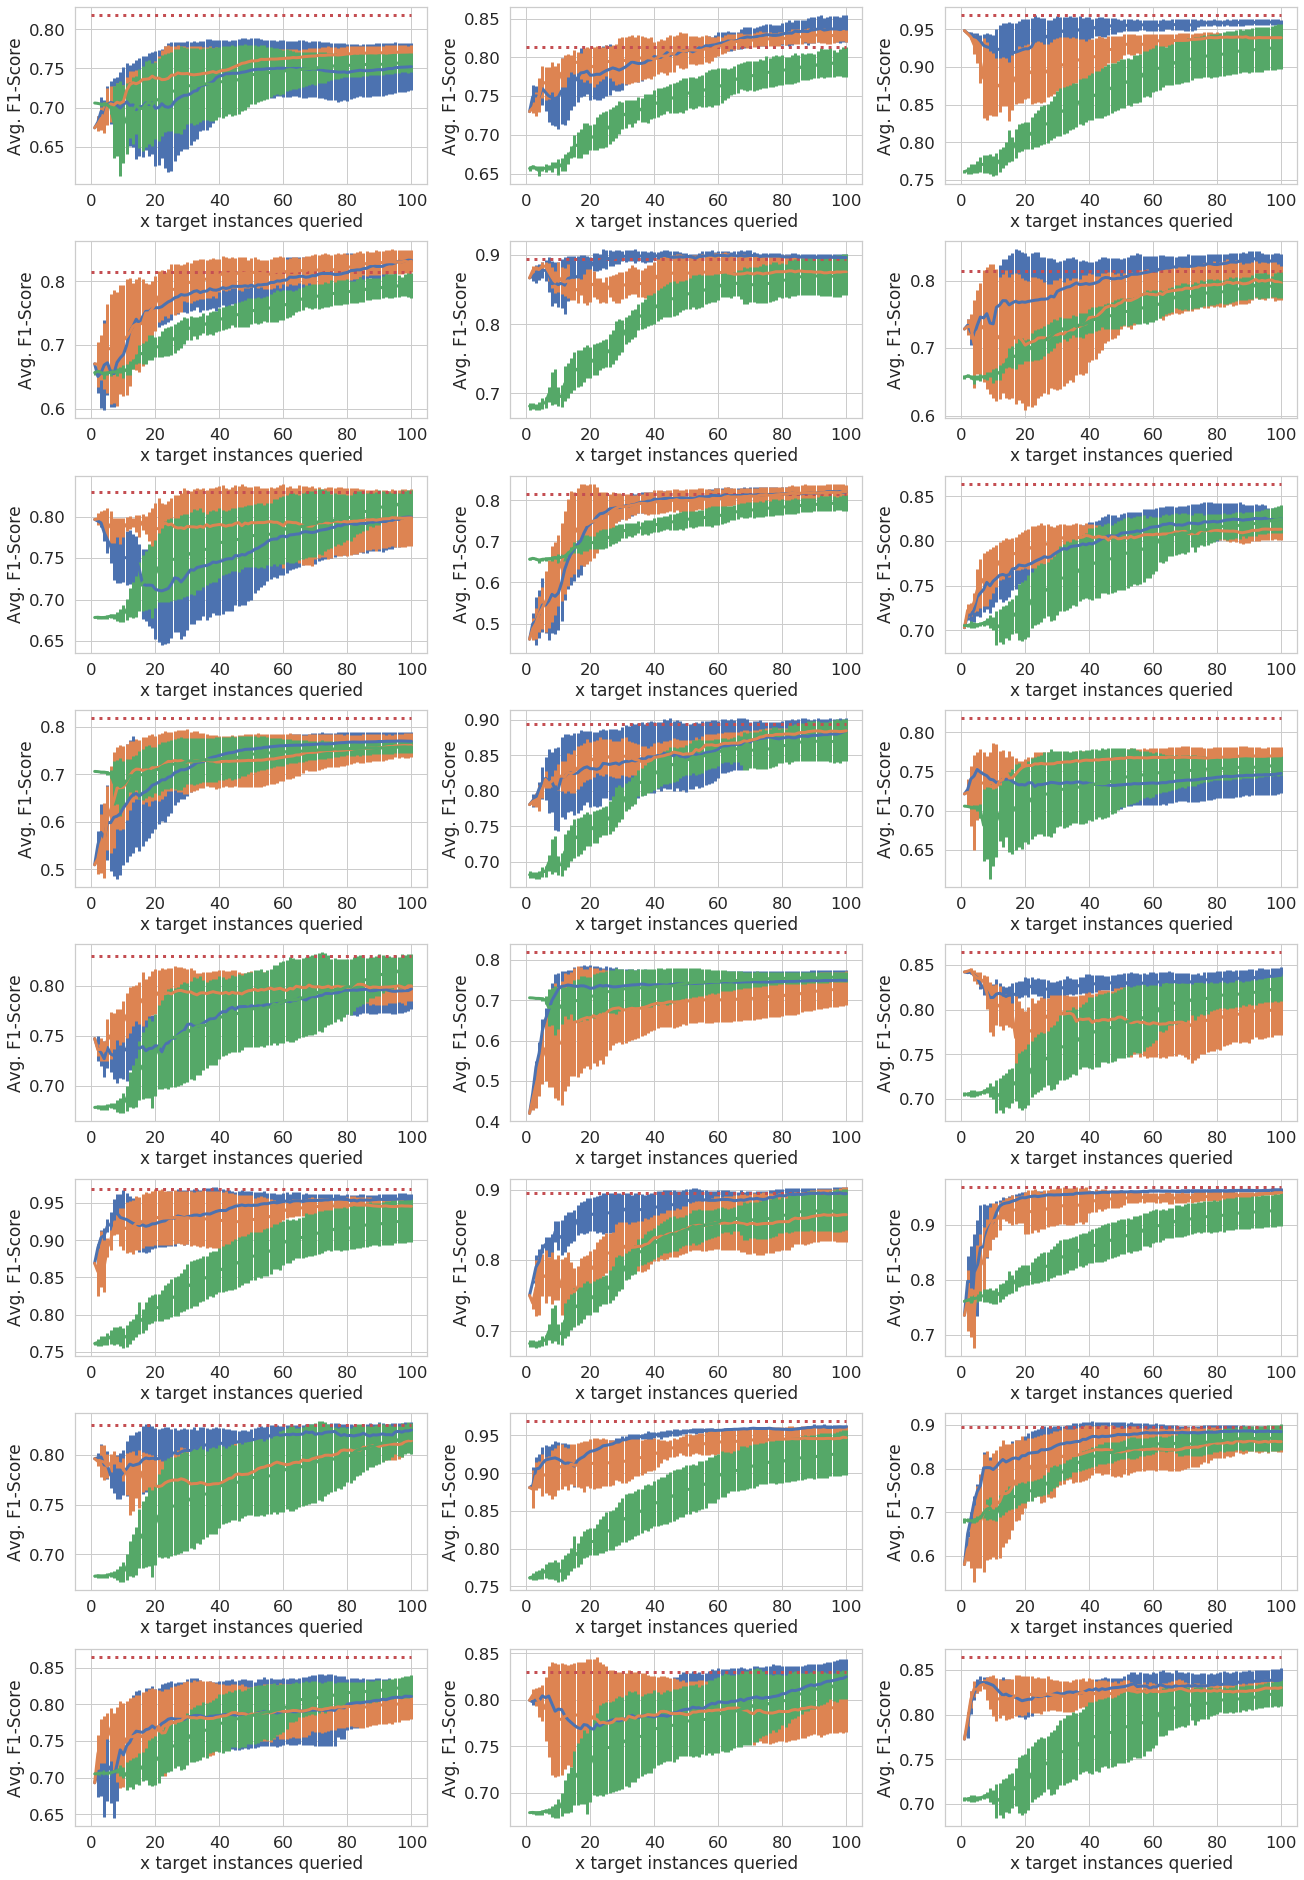

In [167]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = None   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup  # None means only ATL Results are plotted. If al_also = al_results then also al results
selected_weights = ['no_weighting'] #['nn']
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResultsAll(atlx_results_2,quota,candsets,candsets_super_results,n,warm_start,
                              selected_estimator,al_also,selected_qs,
                              selected_weights,errorbars=True,saveFig=True,
                              path_for_output='../../results/atlx/books_atlx_eval_plot_v2',
                              nrows=False,ncols=3,figsize=(18,26))

In [28]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'ban_wor'
target_name = 'ban_bx'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = ['lr_lsvc_rf_dt_xgb']   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup_v2  # None means only ATL Results are plotted. If al_also = al_results then also al results
selected_weights = ['nn'] #['nn']
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResults(atlx_results_10,source_name,target_name,quota,candsets,candsets_super_results,
                             n,warm_start,selected_estimator,al_also,selected_qs,selected_weights,
                             errorbars=True,ylim=None,saveFig=False,path_for_output='./graphics/custom_plots/')

In [67]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'bx_wor'
target_name = 'wor_half'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = None   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup  # None means only ATL Results are plotted. If al_also = al_results then also al results
selected_weights = None #['nn']
quota = 100
n = 5
warm_start=True
# ***********************************************

alut.plotATLRFALUnsupResults(atlx,source_name,target_name,quota,candsets,candsets_super_results,
                             n,warm_start,selected_estimator,al_also,selected_qs,selected_weights,
                             errorbars=False,ylim=None,saveFig=False,path_for_output='./graphics/custom_plots/')

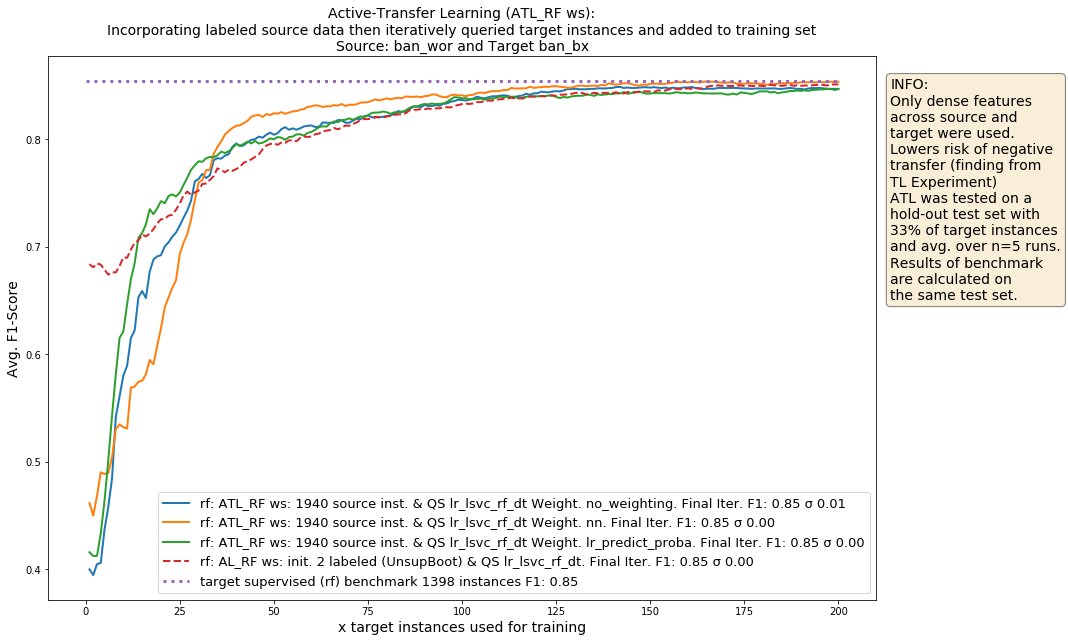

In [143]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'ban_wor'
target_name = 'ban_bx'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = ['lr_lsvc_rf_dt']   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup_v2  # None means only ATL Results are plotted. If al_also = al_results then also al results
quota = 200
n = 5
warm_start=True
# ***********************************************

alut.plotATLRFALUnsupResults(atlx,source_name,target_name,quota,candsets,candsets_super_results,
               n,warm_start,selected_estimator,al_also,selected_qs,
               saveFig=False,path_for_output='./graphics/custom_plots/')

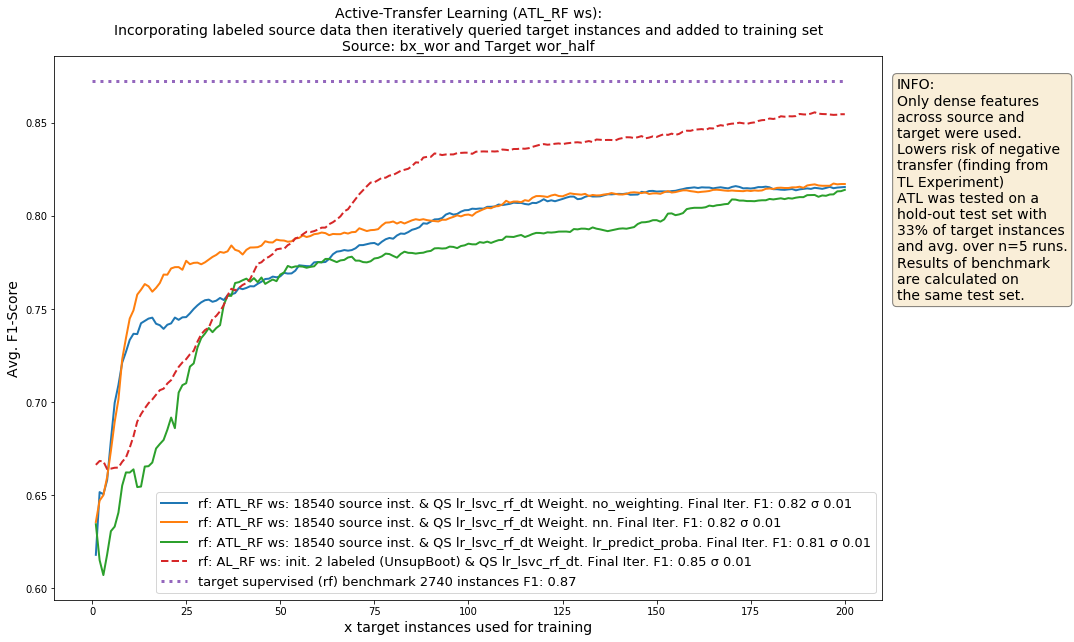

In [144]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'bx_wor'
target_name = 'wor_half'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = ['lr_lsvc_rf_dt']   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup_v2  # None means only ATL Results are plotted. If al_also = al_results then also al results
quota = 200
n = 5
warm_start=True
# ***********************************************

alut.plotATLRFALUnsupResults(atlx,source_name,target_name,quota,candsets,candsets_super_results,
               n,warm_start,selected_estimator,al_also,selected_qs,
               saveFig=False,path_for_output='./graphics/custom_plots/')

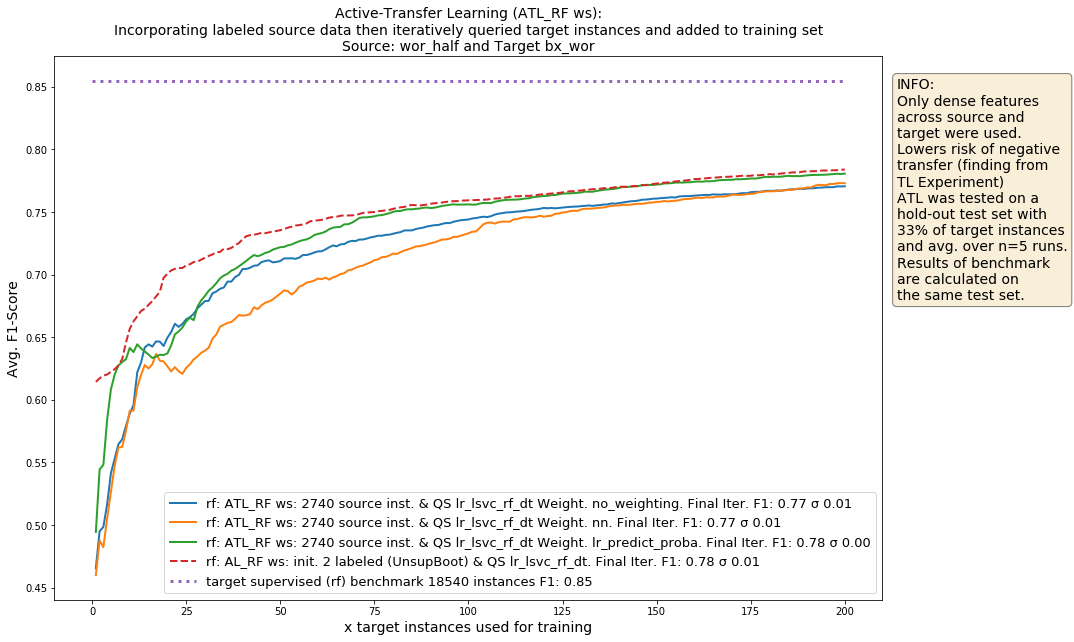

In [145]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'wor_half'
target_name = 'bx_wor'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = ['lr_lsvc_rf_dt']   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup_v2  # None means only ATL Results are plotted. If al_also = al_results then also al results
quota = 200
n = 5
warm_start=True
# ***********************************************

alut.plotATLRFALUnsupResults(atlx,source_name,target_name,quota,candsets,candsets_super_results,
               n,warm_start,selected_estimator,al_also,selected_qs,
               saveFig=False,path_for_output='./graphics/custom_plots/')

In [146]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'ban_wor'
target_name = 'bx_wor'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = ['lr_lsvc_rf_dt']   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup_v2  # None means only ATL Results are plotted. If al_also = al_results then also al results
quota = 200
n = 5
warm_start=True
# ***********************************************

alut.plotATLRFALUnsupResults(atlx,source_name,target_name,quota,candsets,candsets_super_results,
               n,warm_start,selected_estimator,al_also,selected_qs,
               saveFig=False,path_for_output='./graphics/custom_plots/')

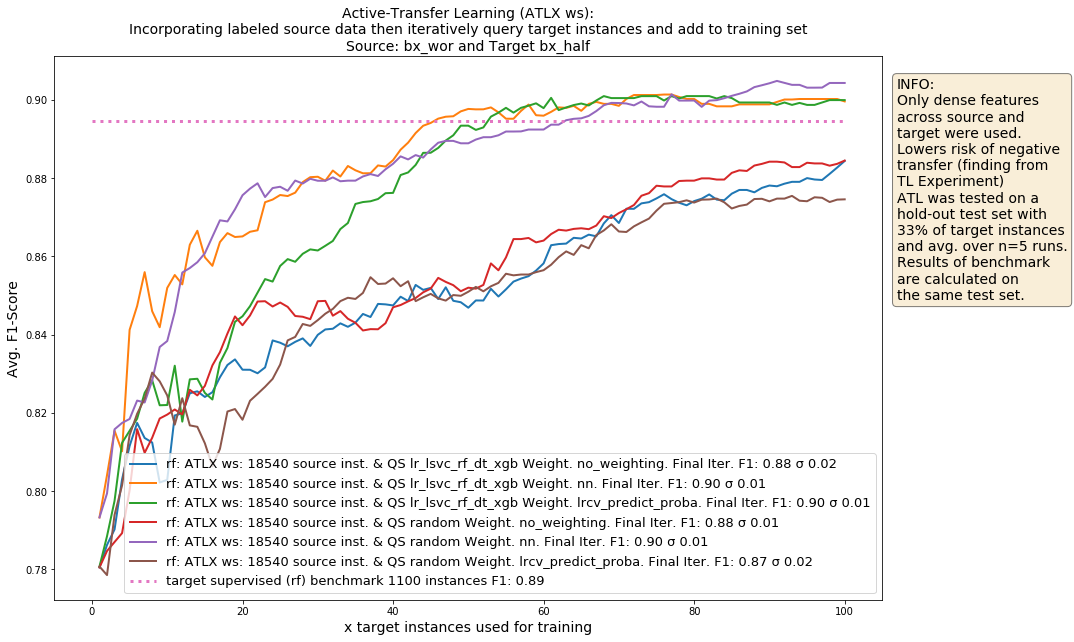

In [137]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'bx_wor'
target_name = 'bx_half'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = ['lr_lsvc_rf_dt_xgb','random']   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = None#al_results_unsup  # None means only ATL Results are plotted. If al_also = al_results then also al results
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResults(atlx_results_2,source_name,target_name,quota,candsets,candsets_super_results,n,warm_start,
                           selected_estimator,al_also,selected_qs,selected_weights=None,errorbars=False,ylim=None,
                           saveFig=False,path_for_output='./graphics/custom_plots/')

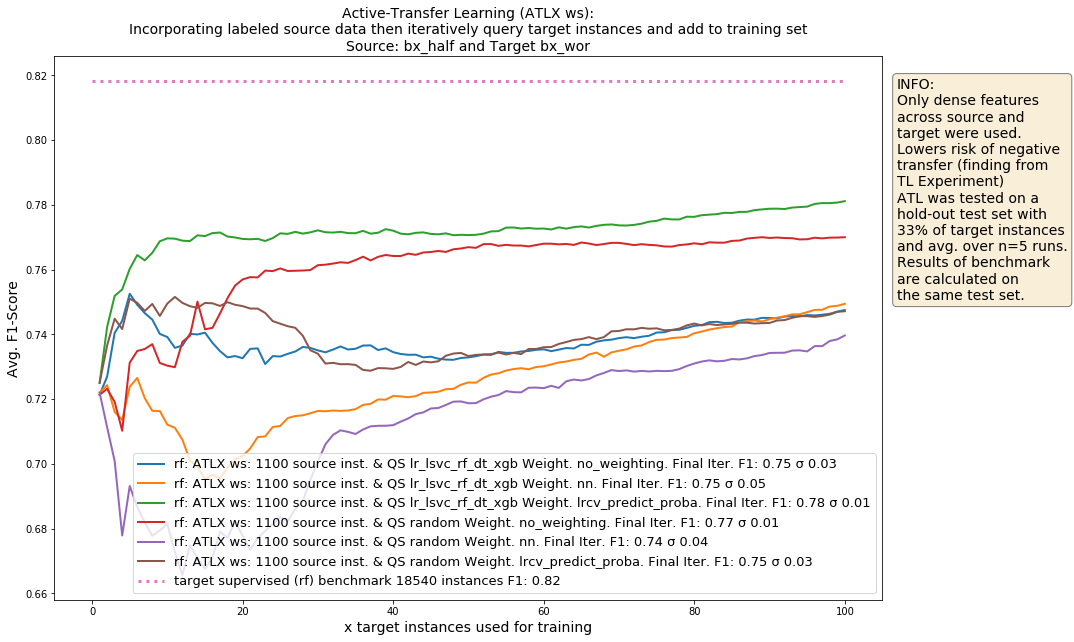

In [138]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'bx_half'
target_name = 'bx_wor'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = ['lr_lsvc_rf_dt_xgb','random']   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = None#al_results_unsup  # None means only ATL Results are plotted. If al_also = al_results then also al results
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResults(atlx_results_2,source_name,target_name,quota,candsets,candsets_super_results,n,warm_start,
                           selected_estimator,al_also,selected_qs,selected_weights=None,errorbars=False,ylim=None,
                           saveFig=False,path_for_output='./graphics/custom_plots/')

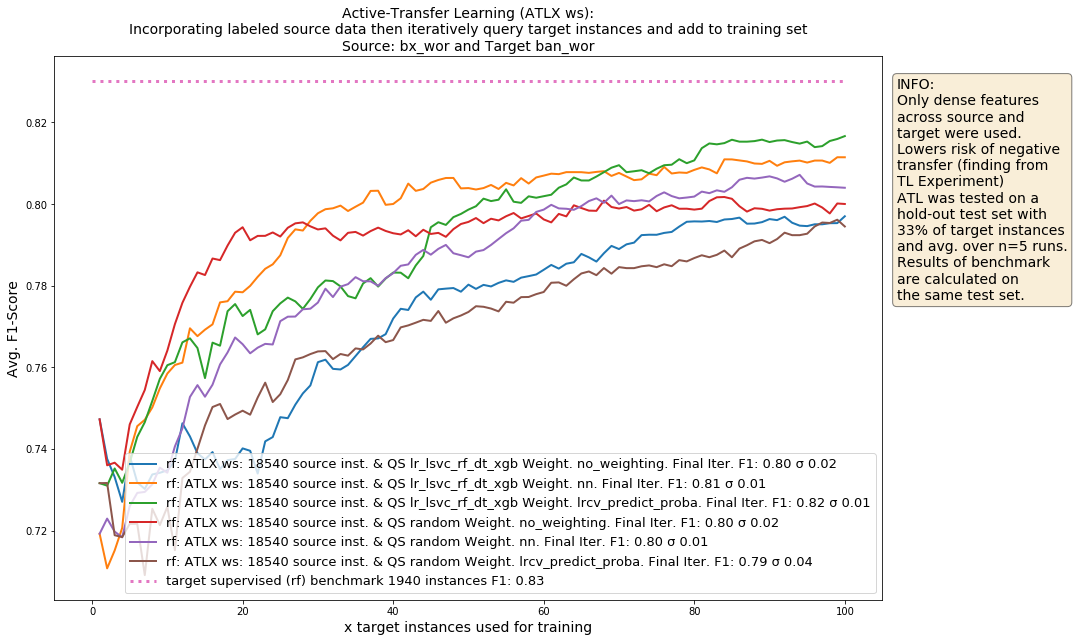

In [139]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'bx_wor'
target_name = 'ban_wor'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = ['lr_lsvc_rf_dt_xgb','random']   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = None#al_results_unsup  # None means only ATL Results are plotted. If al_also = al_results then also al results
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResults(atlx_results_2,source_name,target_name,quota,candsets,candsets_super_results,n,warm_start,
                           selected_estimator,al_also,selected_qs,selected_weights=None,errorbars=False,ylim=None,
                           saveFig=False,path_for_output='./graphics/custom_plots/')

In [140]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'ban_bx'
target_name = 'bx_wor'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = ['lr_lsvc_rf_dt_xgb','random']   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = None#al_results_unsup  # None means only ATL Results are plotted. If al_also = al_results then also al results
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResults(atlx_results_2,source_name,target_name,quota,candsets,candsets_super_results,n,warm_start,
                           selected_estimator,al_also,selected_qs,selected_weights=None,errorbars=False,ylim=None,
                           saveFig=False,path_for_output='./graphics/custom_plots/')